# <font color='red'>**Business Case: Walmart - Confidence Interval and CLT**</font>

## **About Walmart**


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.



**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount


# **1. Importing dataset and libraries**

In [ ]:
#importing Aerofit dataset from drive
!gdown 1RwT0oSlckARbqGbtsLO0_XgfMEbafa9B

Downloading...
From: https://drive.google.com/uc?id=1RwT0oSlckARbqGbtsLO0_XgfMEbafa9B
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 41.3MB/s]


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### <font color='green'>Loading the dataset

In [ ]:
df=pd.read_csv('walmart_data.csv')

#### <font color='green'>Dispalying the sample dataset

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### <font color='green'>Understanding the data



In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


<font color='blue'>We can see that many are of object type and some categorical are found as int. By looking at the data, its clear that only "Purchase" field is numerical, all others are categorical.We need to convert the columns to categorical.

In [ ]:
#changing type of object type columns to category
categorical_cols = ['User_ID','Product_ID','Gender', 'Age','Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Product_Category']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df["Marital_Status"] = df["Marital_Status"].replace({0:"Unmarried", 1:"Married"})
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.duplicated().value_counts()

,count
False,550068


<font color='green'>**Our understanding of the data**</font>
<font color='blue'>
* Total features - **10**
* Total records - **5,50,068**
* Categorical Variables: **Gender, Age, Occupation(masked category),City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category(masked category)**
* User_ID, Product_ID - These are technically IDs but we convert them to category for efficiency and to exclude from modeling or numeric analysis.
* Numerical Variables: **Purchase**
* No Missing Values were found.
* No duplicate entries</font>      

#### <font color='green'>Statistical Summary

In [ ]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


<font color='green'>Observations:</font>

<font color='blue'>

1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products. Top user(1001680) purchased over 1,000 times.
2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller , with a maximum of 1,880 units sold.
3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.
4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future.
5. Occupation - We have 21 Occupation types and Category 4 has maximum purchases.
6. City_Category - We have only 3 types of City. Out of which B category has the purchases - around 42%.
7. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with
(0,2,3,4+) years of stay in current city
8. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers .

# **2. Outliers**

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


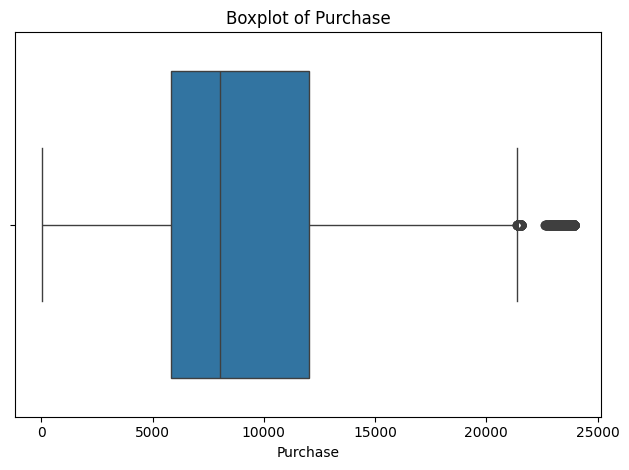

In [ ]:
sns.boxplot(x=df["Purchase"])
plt.title("Boxplot of Purchase")

plt.tight_layout()
plt.show()

In [ ]:
percentiles=np.percentile(df['Purchase'], [0, 25, 50, 75, 100])
formatted = [int(x) for x in percentiles]
print(formatted)

[12, 5823, 8047, 12054, 23961]


<font color='green'>Observations from the boxplot:</font>

<font color='blue'>

*  The majority of purchase values fall between ~₹5,800 and ₹12,000.
*  There are several outliers on the higher end — some purchases go up to ₹24,000+.
* This visually confirms what we saw numerically (right-skewed with high-value outliers).. </font>



### Handling outliers

In [ ]:
# Step 1: Calculate IQR and bounds
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Return the calculated bounds
lower_bound, upper_bound


(np.float64(-3523.5), np.float64(21400.5))

In [ ]:
# Remove outliers
df = df[(df['Purchase'] >= lower_bound) & (df['Purchase'] <= upper_bound)]
print(f"\nData shape after removing outliers: {df.shape}")


Data shape after removing outliers: (547391, 10)


### <font color='green'>Reasons for removing outliers

<font color ="blue"> Removing outliers can significantly improve the accuracy and reliability of your analysis using the Central Limit Theorem (CLT) and confidence intervals.

<font color='blue'>

 1. Outliers can skew the sample mean
 2. Confidence intervals become misleading
 3. Violates assumptions of CLT </font>

In [ ]:
purchase_data = df['Purchase']
Q1 = purchase_data.quantile(0.25)
Q3 = purchase_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(purchase_data >= lower_bound) & (purchase_data <= upper_bound)]

In [ ]:
# Summary statistics
print("Before Outlier Removal:")
print(df['Purchase'].describe())
print("\nAfter Outlier Removal:")
print(df_no_outliers['Purchase'].describe())

Before Outlier Removal:
count    547391.000000
mean       9195.627195
std        4938.872953
min          12.000000
25%        5721.000000
50%        8038.000000
75%       12019.000000
max       21399.000000
Name: Purchase, dtype: float64

After Outlier Removal:
count    547391.000000
mean       9195.627195
std        4938.872953
min          12.000000
25%        5721.000000
50%        8038.000000
75%       12019.000000
max       21399.000000
Name: Purchase, dtype: float64


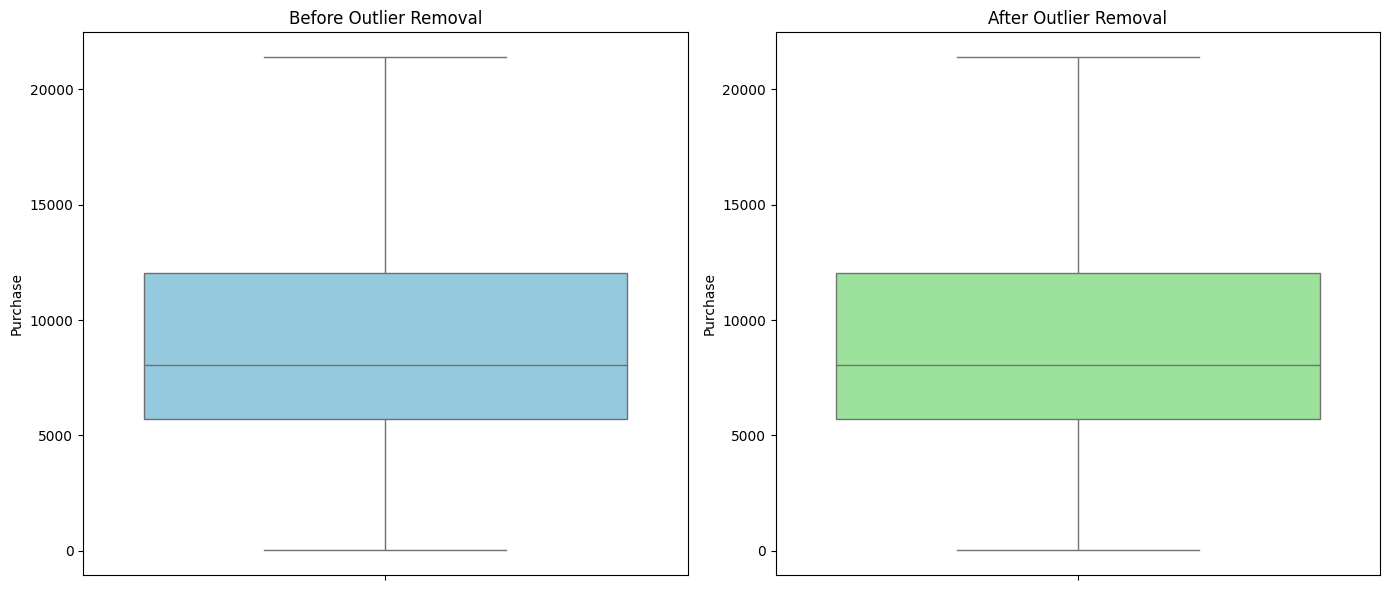

In [ ]:
# Boxplot comparison
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Purchase'], color='skyblue')
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['Purchase'], color='lightgreen')
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
# Confidence interval calculation
def compute_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin, mean + margin

ci_before = compute_confidence_interval(df['Purchase'])
ci_after = compute_confidence_interval(df_no_outliers['Purchase'])

print(f"95% Confidence Interval (Before): {ci_before}")
print(f"95% Confidence Interval (After): {ci_after}")

95% Confidence Interval (Before): (np.float64(9195.62719518589), np.float64(9182.543570438942), np.float64(9208.71081993284))
95% Confidence Interval (After): (np.float64(9195.62719518589), np.float64(9182.543570438942), np.float64(9208.71081993284))


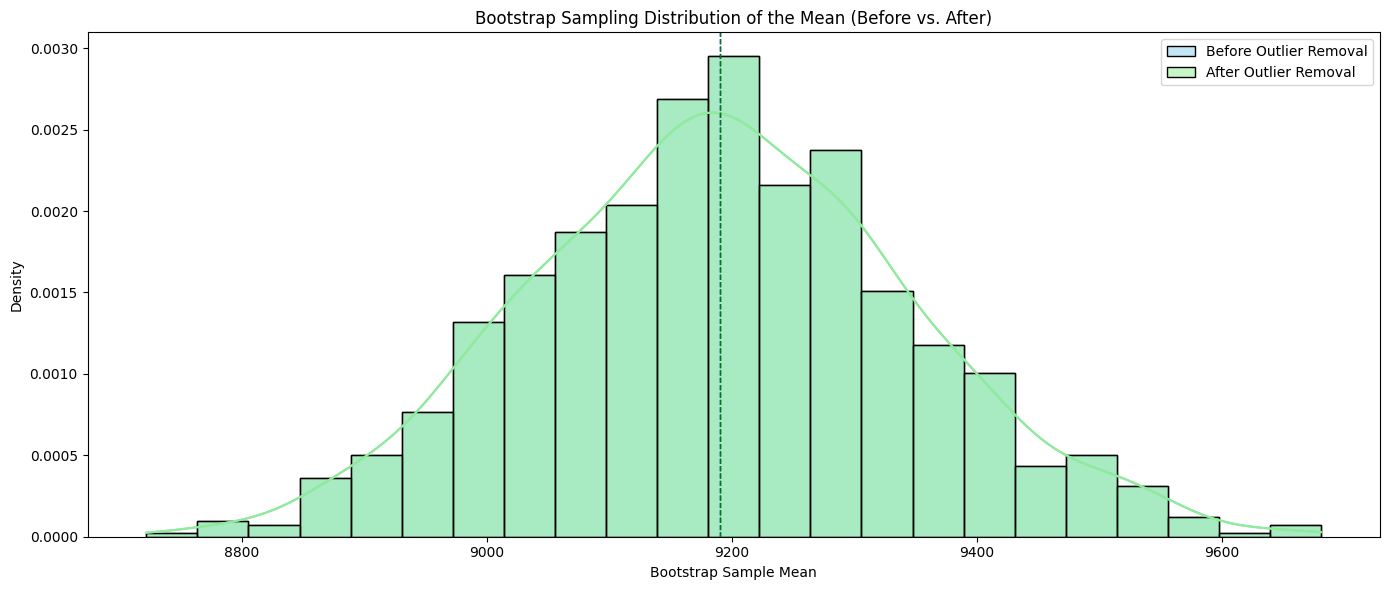

(np.float64(9190.605447999998),
 np.float64(154.274830116028),
 np.float64(9190.605447999998),
 np.float64(154.274830116028))

In [ ]:
# Bootstrap sampling
def bootstrap_means(data, n_iterations=1000, sample_size=1000, seed=42):
    np.random.seed(seed)
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return np.array(means)

bootstrap_before = bootstrap_means(df['Purchase'].values)
bootstrap_after = bootstrap_means(df_no_outliers['Purchase'].values)

plt.figure(figsize=(14, 6))
sns.histplot(bootstrap_before, kde=True, color='skyblue', label='Before Outlier Removal', stat='density')
sns.histplot(bootstrap_after, kde=True, color='lightgreen', label='After Outlier Removal', stat='density')
plt.axvline(np.mean(bootstrap_before), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(bootstrap_after), color='green', linestyle='dashed', linewidth=1)
plt.title("Bootstrap Sampling Distribution of the Mean (Before vs. After)")
plt.xlabel("Bootstrap Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

bootstrap_before.mean(), bootstrap_before.std(), bootstrap_after.mean(), bootstrap_after.std()

# **3. Univariate Analysis**

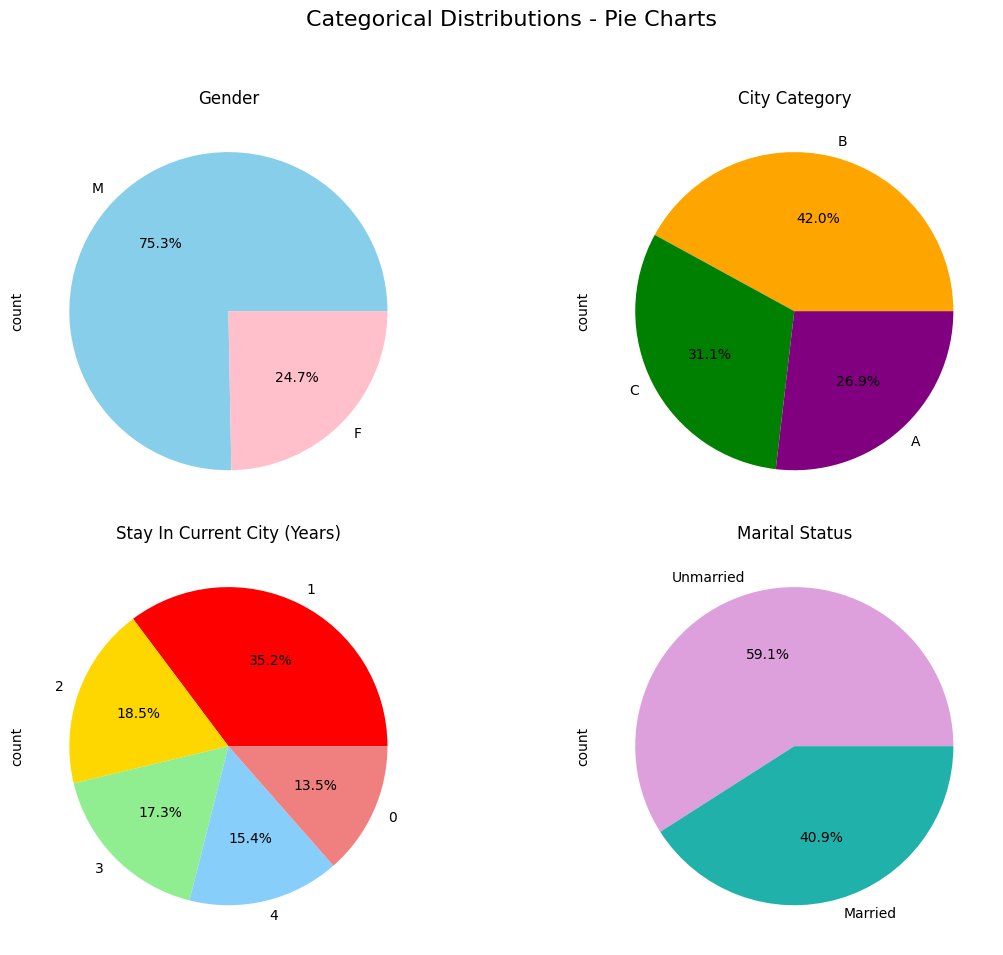

In [ ]:
meanfig, axes = plt.subplots(2, 2, figsize=(12, 10))
meanfig.suptitle('Categorical Distributions - Pie Charts', fontsize=16)

# Plot pie charts
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='Gender', colors=['skyblue', 'pink'])
df['City_Category'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='City Category', colors=['orange', 'green', 'purple'])
df['Stay_In_Current_City_Years'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='Stay In Current City (Years)', colors=['red', 'gold', 'lightgreen', 'lightskyblue','lightcoral'])
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='Marital Status', labels=['Unmarried', 'Married'], colors=['plum', 'lightseagreen'])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<font color='green'>**Insights**


<font color='blue'>**Gender Distribution**</font>
The dataset has a slight male dominance, with men making up a bit more than women. This suggests marketing efforts might consider tailoring more offerings toward the male demographic while not ignoring the female segment.



<font color='blue'>**City Category Representation**</font>
Customers are relatively evenly spread across A, B, and C city categories, with Category B leading slightly. This implies that consumer behavior across different urbanization levels is well-represented, which is useful for comparative regional analysis.


<font color='blue'>**Stay Duration and Marital Status Trends**</font>

A significant portion of customers have stayed in their current city for 1 year, possibly indicating mobility or recent relocations.

Unmarried individuals slightly outnumber married ones, suggesting a younger or more single-oriented consumer base.



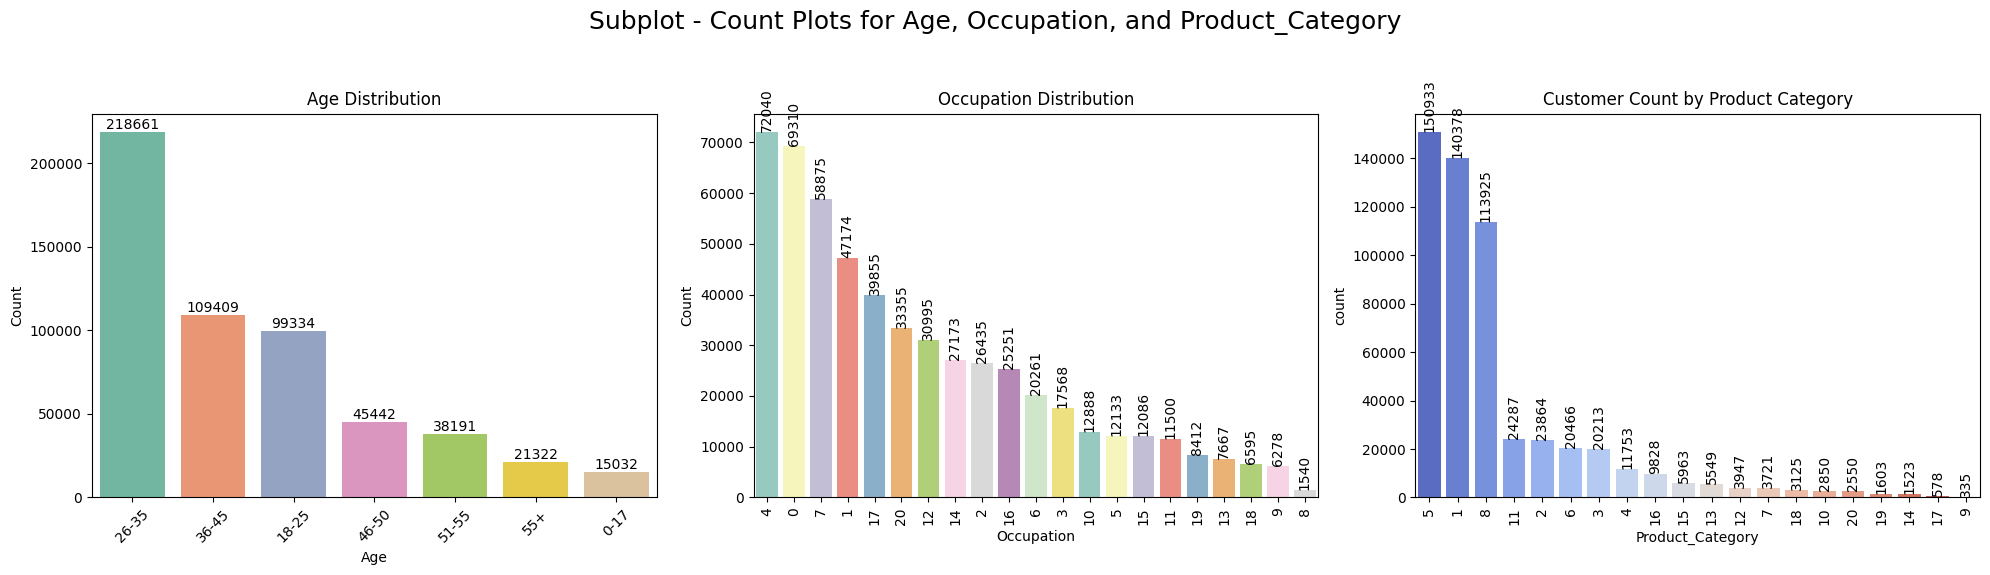

In [ ]:
# Create subplots for Age, Occupation, and Purchase bins in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Subplot - Count Plots for Age, Occupation, and Product_Category', fontsize=18)

# Countplot for Age
Age_category = df['Age']
ax=sns.countplot(x='Age', data=df, order=Age_category.value_counts().index, ax=axes[0], palette='Set2')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
axes[0].set_title('Age Distribution')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Countplot for Occupation
Occupation_category = df['Occupation']
ax=sns.countplot(x='Occupation', data=df,order=Occupation_category.value_counts().index, ax=axes[1], palette='Set3')
for container in ax.containers:
    ax.bar_label(container, label_type='edge',rotation=90)
axes[1].set_title('Occupation Distribution')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

ax=sns.countplot(x='Product_Category', data=df,order=df['Product_Category'].value_counts().index, ax=axes[2], palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container, label_type='edge',rotation=90)
axes[2].set_title('Customer Count by Product Category')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<font color='green'>**Insights**

<font color='blue'>**Age Distribution Insight**</font>
The 26-35 age group dominates the customer base, followed by the 18-25 and 36-45 groups. This suggests the primary shoppers are young adults and mid-career individuals, indicating strong engagement from a digitally active demographic.

<font color='blue'>**Occupation Diversity**</font>
Customers span a wide range of occupations, but certain groups (like occupation codes 4 and 0) are more prominent. This could reflect higher spending from certain professions or more accessibility to the platform in those work types.

<font color='blue'>**Popular Product Categories**</font>
A few product categories, notably category*** 5, 1, and 8*** account for the highest number of purchases. This highlights key product areas that are driving customer interest and could be used to target promotions or bundling strategies.



In [ ]:
Occupation_category

,Occupation
0,10
1,10
2,10
3,10
4,16
...,...
550063,13
550064,1
550065,15
550066,1


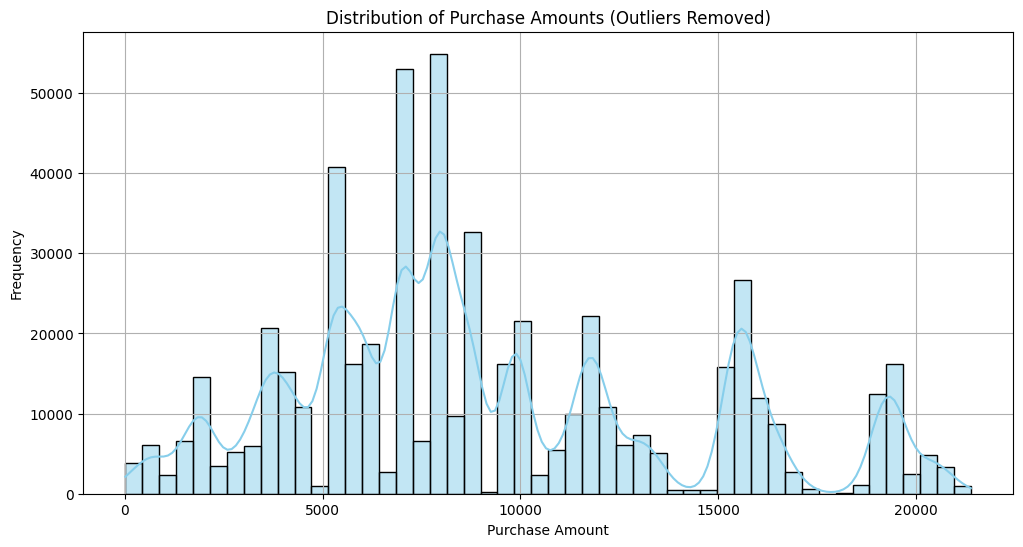

In [ ]:
# Plotting a histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['Purchase'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amounts (Outliers Removed)')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<font color='green'>**Insights**

<font color='blue'>**Smoother Distribution Without Outliers**</font>
Removing outliers results in a more bell-shaped, concentrated distribution, while the original version with outliers is right-skewed, emphasizing rare but large purchases.

<font color='blue'>**Mean Becomes More Representative**</font>

With outliers: Mean ≈ ₹9,264

Without outliers: Mean ≈ ₹9,196
Outliers inflate the mean slightly, which may misrepresent the typical customer's purchase behavior.

<font color='blue'>**Reduced Variability (Std Dev)**</font>

Std Dev with outliers: ₹5,023

Std Dev without outliers: ₹4,939
The data becomes less dispersed after removing outliers, offering a more stable and reliable analysis for modeling or forecasting.

# **4. Bivariate Analysis**

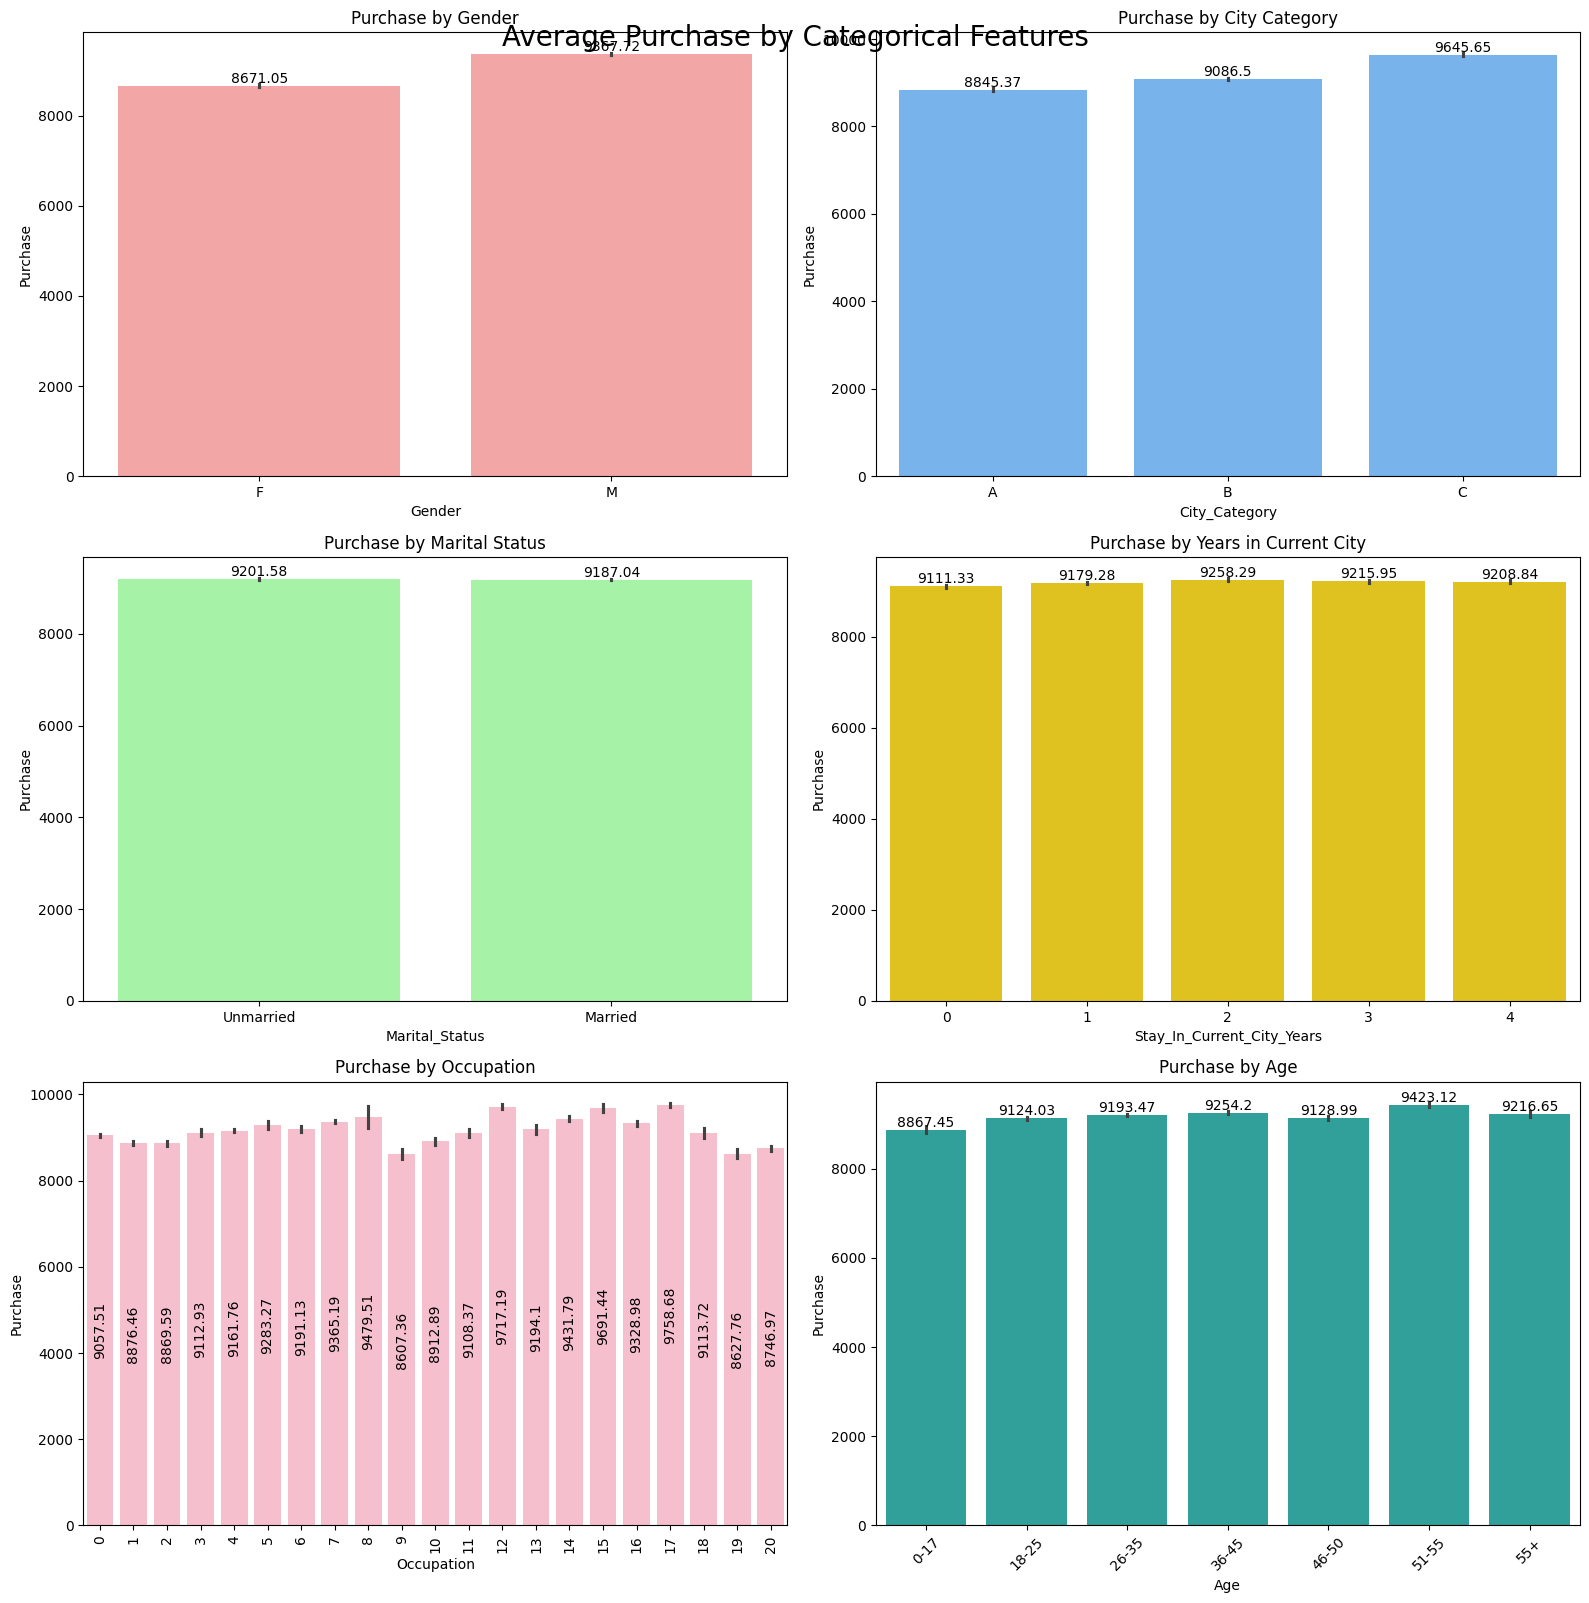

In [ ]:
# Define color palette
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700', '#FFB6C9', '#20B2AA']

# Create subplots in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
#fig.suptitle('Average Purchase by Categorical Features', fontsize=20, y=0.92)

# Plot 1: Gender
ax = sns.barplot(data=df, x="Gender", y="Purchase", ax=axes[0, 0], color=colors[0])
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title("Purchase by Gender")

# Plot 2: City Category
ax = sns.barplot(data=df, x="City_Category", y="Purchase", ax=axes[0, 1], color=colors[1])
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title("Purchase by City Category")

# Plot 3: Marital Status
ax = sns.barplot(data=df, x="Marital_Status", y="Purchase", ax=axes[1, 0], color=colors[2])
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title("Purchase by Marital Status")

# Plot 4: Stay In Current City Years
ax = sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", ax=axes[1, 1], color=colors[3])
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title("Purchase by Years in Current City")

# Plot 5: Occupation
ax = sns.barplot(data=df, x="Occupation", y="Purchase", ax=axes[2, 0], color=colors[4])
ax.bar_label(ax.containers[0], label_type="center", rotation=90)
ax.set_title("Purchase by Occupation")
ax.tick_params(axis='x', rotation=90)

# Plot 6: Age
ax = sns.barplot(data=df, x="Age", y="Purchase", ax=axes[2, 1], color=colors[5])
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title("Purchase by Age")
ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.show()


<font color='green'>Observations from the countplots:</font>

<font color='blue'>

*  Males spent slighly more than the Females.
* Category C City has more purchase spent followed by B and then A.
* Marital Status: Unmarried people has very slight higher spent than married people showing Marital status is not a strong influencer on spending behavior.
* There is increase in spending from new residents(0 Years) till 2 years and it reduces from year 3.
* Certain occupations like 8,12,15 and 17 shows higher spends. Targeting those profession customers can increase sales.
* 36–45 group is typically in their peak earning years, financially stable, and possibly shopping for families — makes sense they top the chart. 51-55 group might be empty nesters or late-career professionals, spending on comfort, home upgrades, or even gifts — an often ignored but valuable segment.Younger groups (18-25) have limited disposable income, so targeting them with heavy promotions may not yield high returns. </font>

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4,Unmarried,8,7969


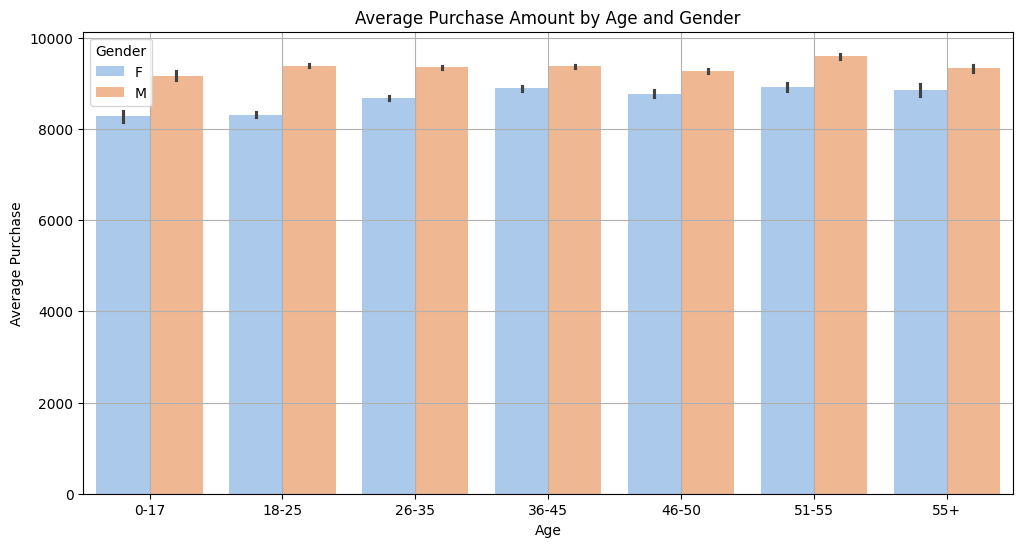

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df, estimator='mean', palette='pastel')
plt.title('Average Purchase Amount by Age and Gender')
plt.ylabel('Average Purchase')
plt.grid(True)
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* Men Consistently Spend More Across All Age Groups.
* Peak Spending Age: 26-35
* Drop in spending among Older Age Groups.</font>

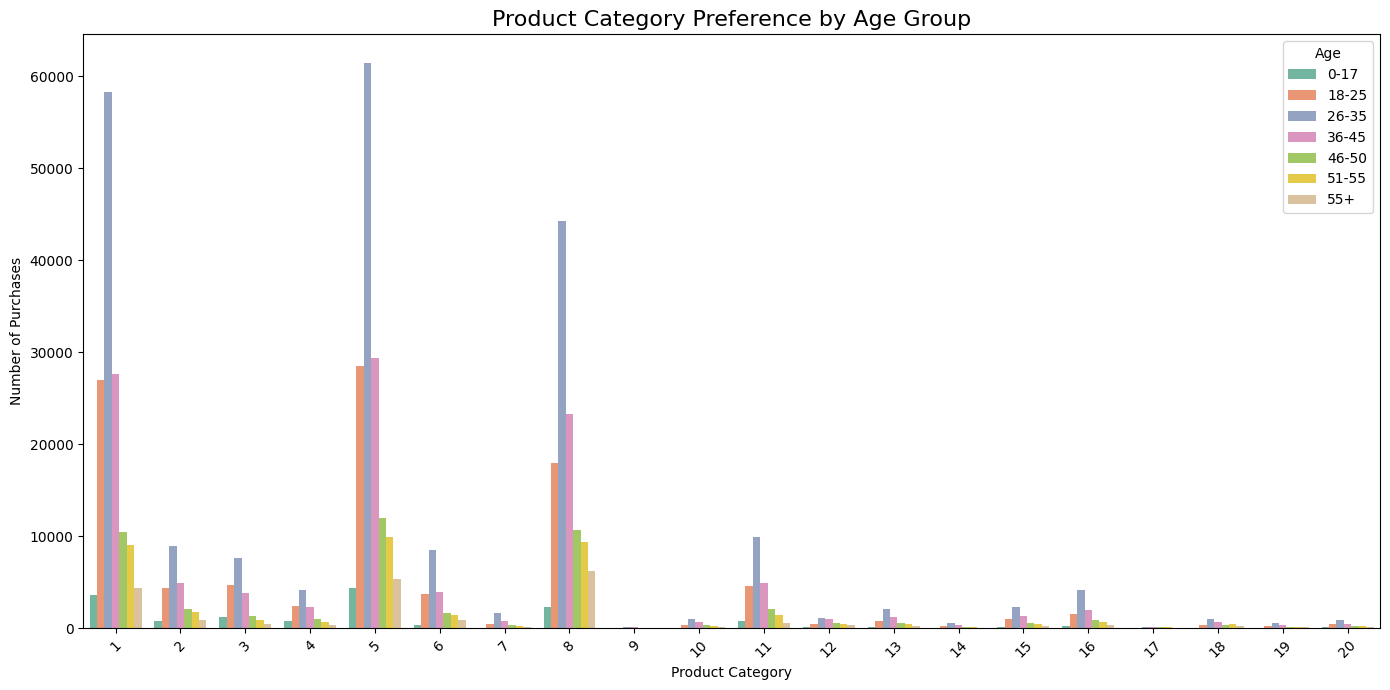

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Product_Category', hue='Age', palette='Set2')

plt.title("Product Category Preference by Age Group", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* Product Category 1 is a Universal Favorite.
* Youth Interest in Tech/Trendy Items.</font>


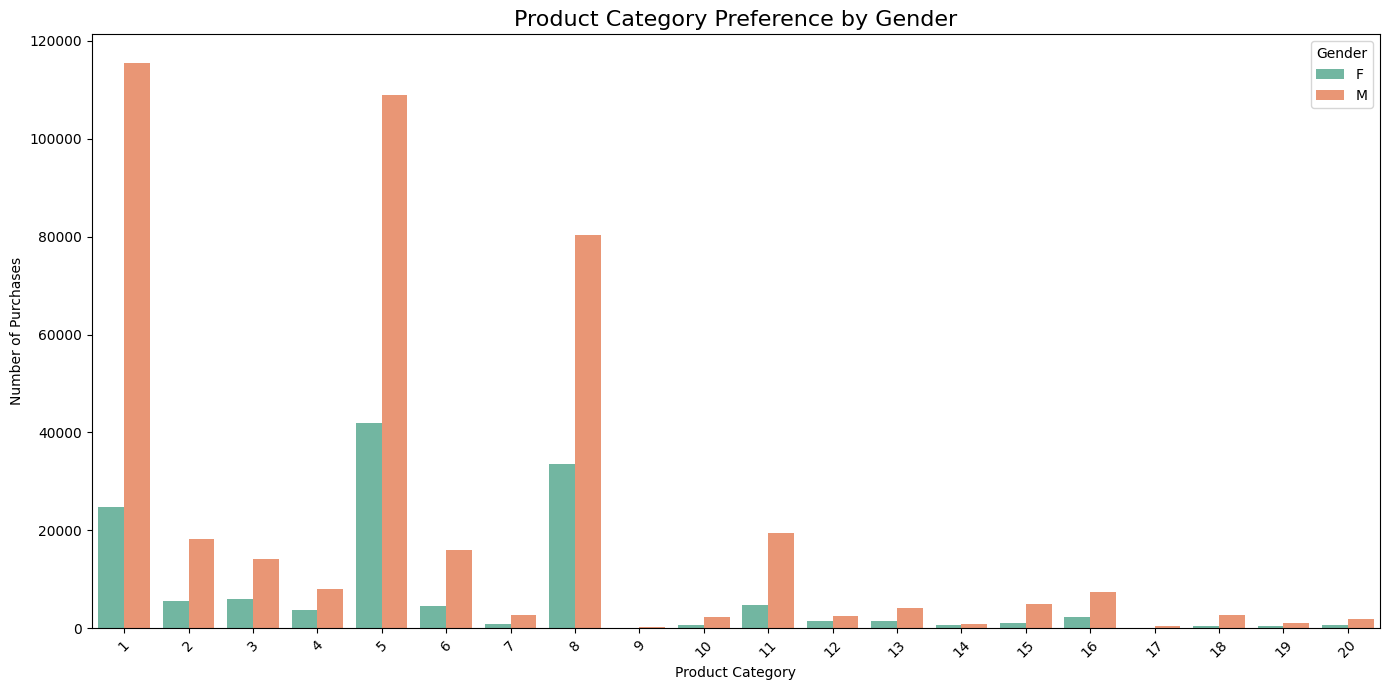

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Product_Category', hue='Gender', palette='Set2')

plt.title("Product Category Preference by Gender", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* Both Genders Prefer Product Category 1.
* Males Dominate in Most Categories.
* Slight Female Preference in Select Categories.</font>

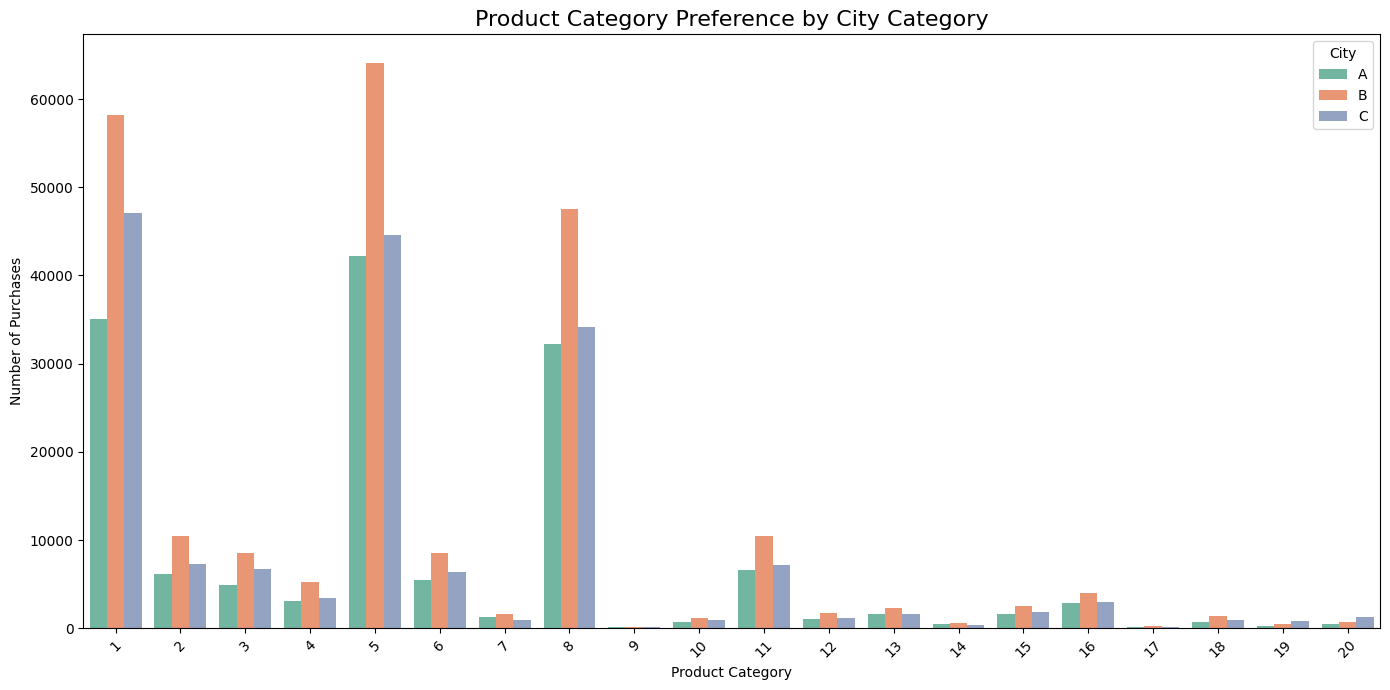

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Product_Category', hue='City_Category', palette='Set2')

plt.title("Product Category Preference by City Category", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* City Category B Leads in Overall Purchases.
* Category A (Metro Cities) Has Diverse Interest.
* Category C Buys Less, But Follows the Trend.</font>

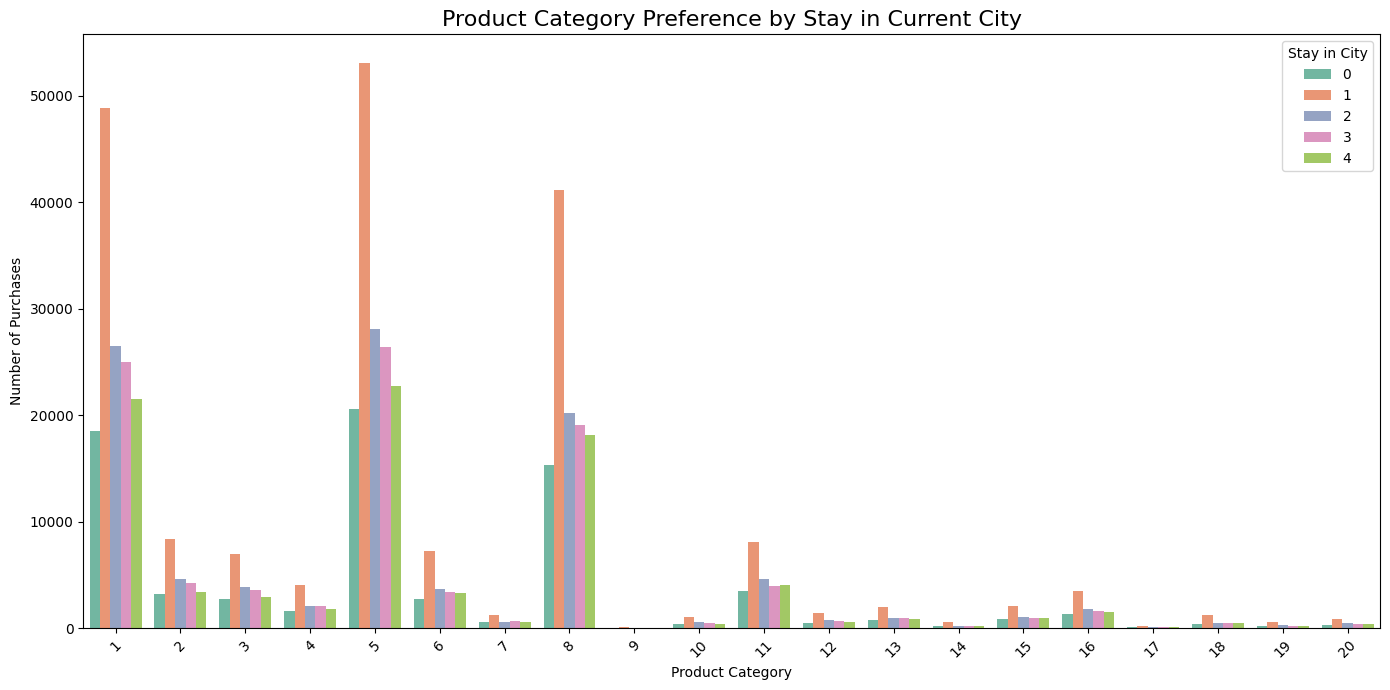

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Product_Category', hue='Stay_In_Current_City_Years', palette='Set2')

plt.title("Product Category Preference by Stay in Current City", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='Stay in City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* 1-Year Residents Are the Most Active Shoppers.
* Stable Trends Across Long-Term Residents.
* 0-Year (Newcomers?) Have Lower Purchases. </font>


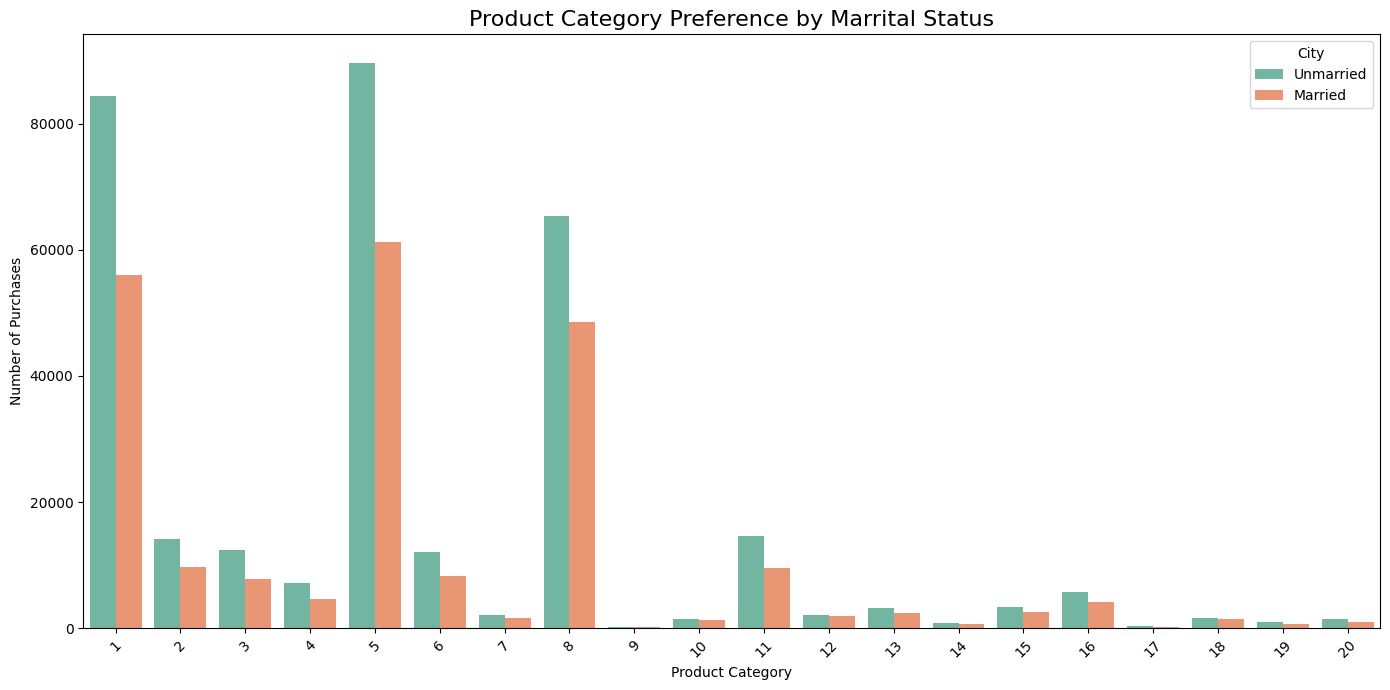

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Product_Category', hue='Marital_Status', palette='Set2')

plt.title("Product Category Preference by Marrital Status", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* Unmarried Individuals Dominate Most Categories.
* Married Customers Focus on Essentials.
* Sharp Drop in Niche Categories for Married Group. </font>

<Axes: xlabel='City_Category', ylabel='Occupation'>

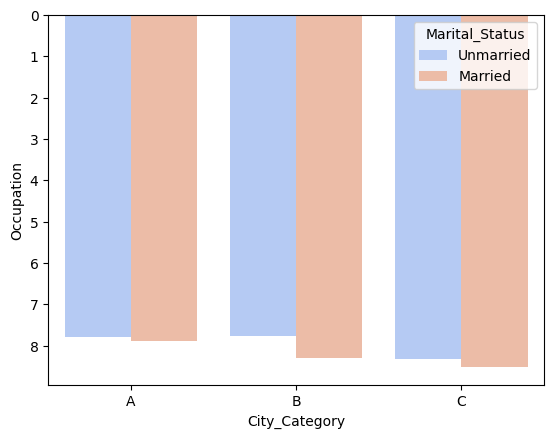

In [ ]:
sns.barplot(x='City_Category', y='Occupation', hue='Marital_Status', data=df, palette='coolwarm',ci=None)

<font color='green'>**Insights**

<font color='blue'>City Category A:

Both single and married individuals show a similar average occupation level.

Slightly higher average occupation code for married individuals.

<font color='blue'>City Category B:

Married individuals tend to have a higher average occupation code compared to singles, indicating potentially more diverse or senior roles.

<font color='blue'>City Category C:

Occupation levels are relatively balanced, though singles might have a slightly higher average compared to married individuals.

Occupation codes (likely numeric proxies for job types or industry categories) vary more distinctly in City Category B between marital statuses.

This could reflect differences in career choices or opportunities influenced by marital status in different city types (e.g., urban vs. rural or metro vs. non-metro).

<Axes: xlabel='Age', ylabel='Purchase'>

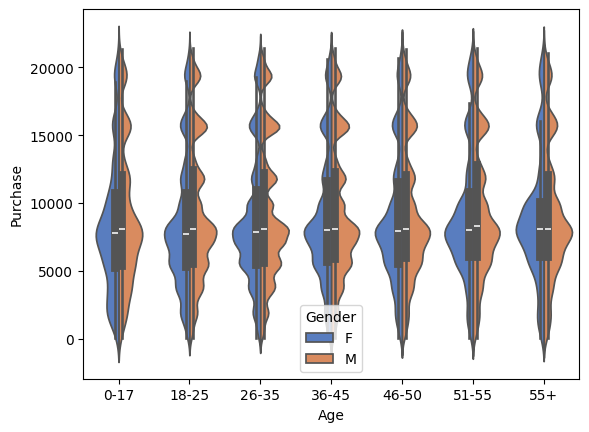

In [ ]:
sns.violinplot(x='Age', y='Purchase', hue='Gender', data=df, palette='muted', split=True)

<font color='green'>**Insights**

<font color='blue'>

* The distribution of purchases varies clearly across different age groups.
* The width of each violin reflects the density of purchase amounts—wider means more frequent purchases at that value range.
* The peak spending group appears to be 26-35 years, with a high density of higher purchase amounts.
* 18-25 and 36-45 also show strong spending behavior, though with slightly less density at the upper end.
</font>


# **5. Data Exploration**

### What products are different age groups buying?

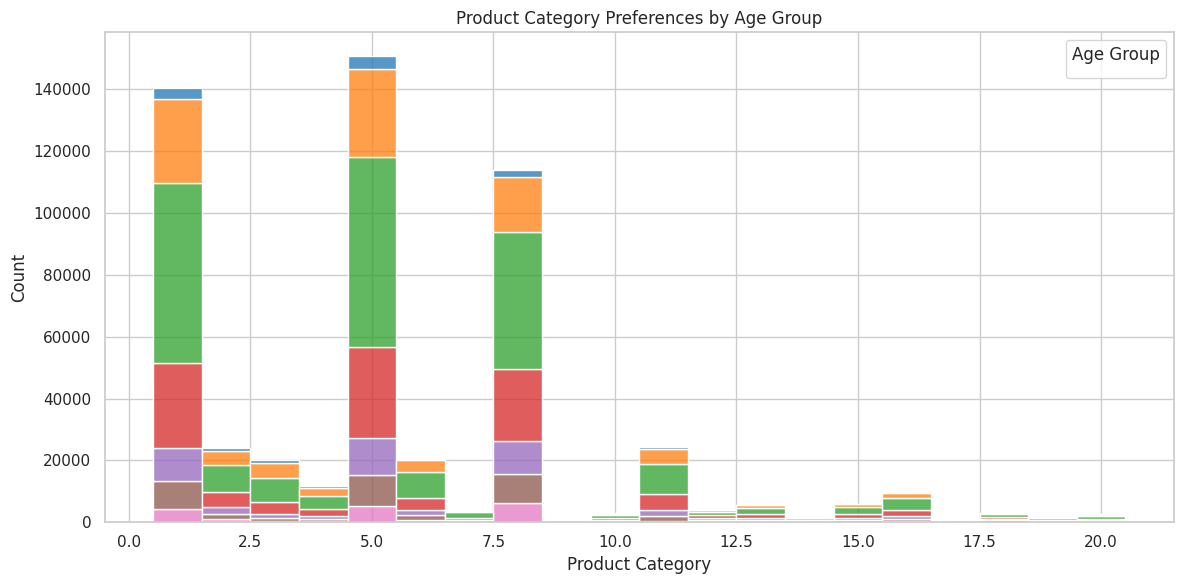

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot a stacked histogram of product categories by age group
sns.histplot(
    data=df,
    x='Product_Category',
    hue='Age',
    multiple='stack',
    palette='tab10',
    bins=30
)

# Add plot labels and legend
plt.title('Product Category Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

<font color='green'>**Insights**:


<font color='blue'>

* Product Categories 1, 5, 8  are the most popular across all age groups.
* These likely represent commonly used consumer goods (e.g., electronics, clothing, household items).
* Age group 26-35 dominates most product categories in purchase volume.
* Suggests this group is the most active shoppers—possibly due to higher disposable income and lifestyle needs.
* Younger age groups (0-17, 18-25):
* Tend to favor specific categories, like 1, 5, and 8.
* Likely influenced by tech, entertainment, or fashion trends.
* Older age groups (46+ and 55+):
* Their purchase frequency is lower overall.
* When they do purchase, they lean towards more limited categories—possibly essentials.</font>



### <font color='green'>Is there a relationship between age, marital status, and the amount spent?

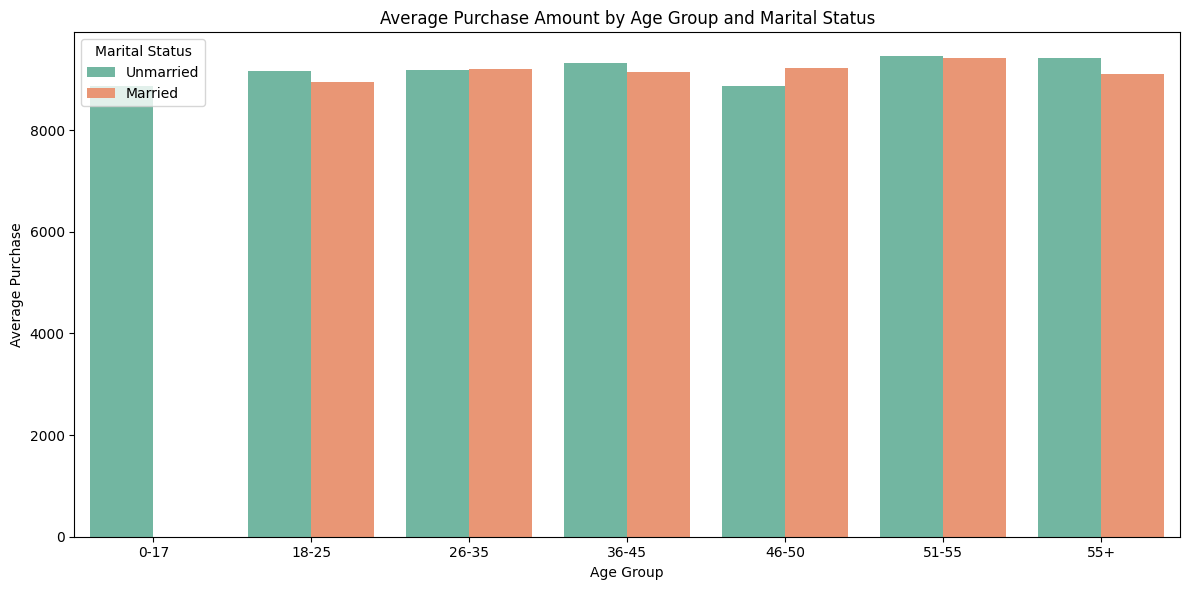

In [ ]:
df['Marital_Label'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})
avg_purchase_multivariate = df.groupby(['Age', 'Marital_Status'])['Purchase'].mean().reset_index()


avg_purchase_multivariate
# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase', hue='Marital_Status', data=avg_purchase_multivariate, palette='Set2')
plt.title('Average Purchase Amount by Age Group and Marital Status')
plt.ylabel('Average Purchase')
plt.xlabel('Age Group')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* 26-35 and 36-45 are the top spending age groups, regardless of marital status.
* This aligns with life stages where individuals typically have higher income and more spending responsibilities.
* In most age groups, married individuals spend more on average than singles.
* Particularly strong in the 26-35 and 36-45 groups — possibly due to family-related purchases.</font>

**Exceptions:**

<font color='blue'>

* In the 0-17 and 55+ groups, singles spend a bit more, but the difference is minor.
* There's a clear relationship: Both age and marital status affect purchase behavior.
* Married individuals in middle age groups (26–45) are the top spenders, likely reflecting a combination of financial stability and household needs.</font>



### <font color='green'>Are there preferred product categories for different genders?

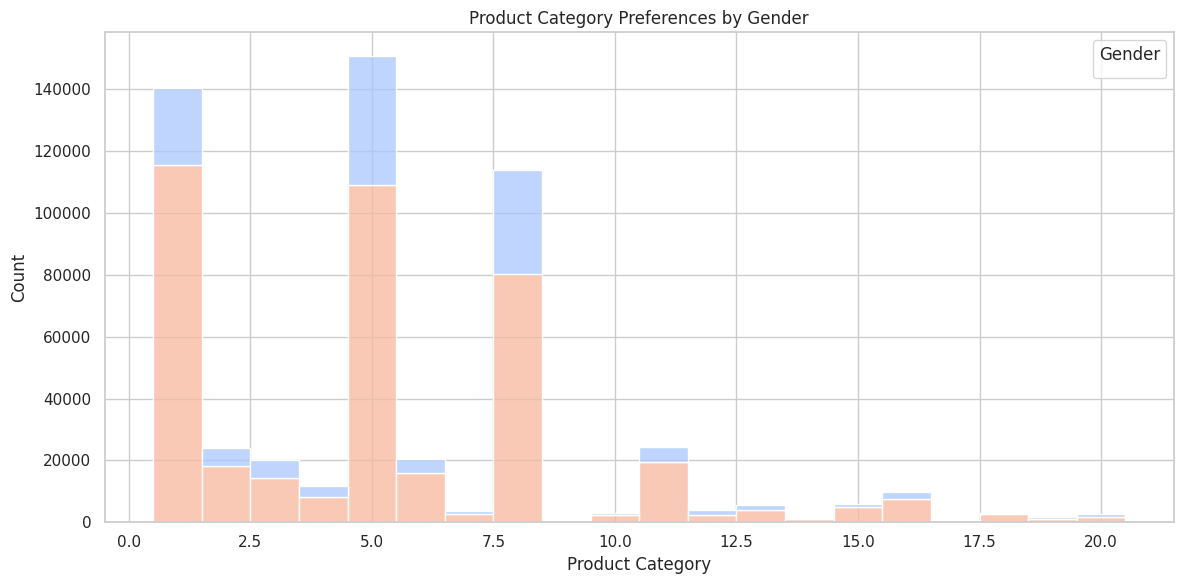

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Stacked histogram: Product Category vs. Gender
sns.histplot(
    data=df,
    x='Product_Category',
    hue='Gender',
    multiple='stack',
    palette='coolwarm',
    bins=30
)

# Add plot labels and title
plt.title('Product Category Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* Males overall show higher activity across more product categories.
* Females show concentration in fewer categories, possibly with more selective or specialized purchasing. </font>



# **6. CLT and Confidence Interval**

### <font color='green'>How does gender affect the amount spent?

  Gender     Purchase
0      F  8671.049039
1      M  9367.724355


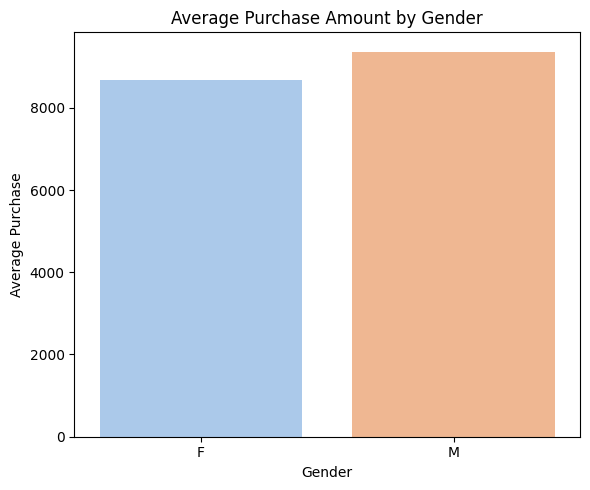

In [ ]:
# Calculate average purchase by gender
avg_purchase_by_gender = df.groupby('Gender')['Purchase'].mean().reset_index()
print(avg_purchase_by_gender)


plt.figure(figsize=(6, 5))
sns.barplot(x='Gender', y='Purchase', data=avg_purchase_by_gender, palette='pastel')
plt.title('Average Purchase Amount by Gender')
plt.ylabel('Average Purchase')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

<font color='green'>**Insights**

<font color='blue'>

**Average Purchase Amount by Gender**

<font color='blue'>

* After analyzing the purchase data, we found:
    Average Purchase Amount (Female): ₹8,671
    Average Purchase Amount (Male): ₹9,367
* Males spend more per transaction on average than females.
* The difference is approximately ₹700, indicating a 7–8% higher spend by male customers.
* This suggests that:
   1. Male customers may be purchasing higher-priced items more frequently.
   2. There may be gender-based differences in product category preferences (e.g., electronics vs apparel).
   3. Marketing campaigns could consider tailored promotions to increase average spend among female customers. </font>

In [ ]:
# Filter female customers
female_data = df[df['Gender'] == 'F']

# Get purchase amounts for females
female_purchases = female_data['Purchase']

# Calculate sample statistics
mean_f = female_purchases.mean()
std_f = female_purchases.std()
n_f = female_purchases.count()

# Z-score for 95% confidence interval (95%)
z = 1.96

# Standard error
se_f = std_f / np.sqrt(n_f)

# Confidence interval
ci_lower = mean_f - z * se_f
ci_upper = mean_f + z * se_f

print(f"Mean: {mean_f}, Standard Deviation :{std_f}, Count :{n_f},CI Lower :{ci_lower}, CI Upper :{ci_upper}")


Mean: 8671.049038603756, Standard Deviation :4679.058483084425, Count :135220,CI Lower :8646.109174713121, CI Upper :8695.988902494391


<font color='green'>Confidence Interval for Female Customers' Purchase Amount
Using the sample of 135,809 female customers, we found:
* Sample Mean (₹): 8,671.04
* Sample Std Dev (₹): 4,679.05
* 95% Confidence Interval (₹): [8646.10, 8695.98]</font>



In [ ]:
# Filter male customers
male_data = df[df['Gender'] == 'M']

# Get purchase amounts for males
male_purchases = male_data['Purchase']

# Calculate sample statistics
mean_m = male_purchases.mean()
std_m = male_purchases.std()
n_m = male_purchases.count()

# Standard error
se_m = std_m / np.sqrt(n_m)

# Confidence interval for males
ci_lower_m = mean_m - z * se_m
ci_upper_m = mean_m + z * se_m

(mean_m, std_m, n_m, ci_lower_m, ci_upper_m)
print(f"Mean: {mean_m}, Standard Deviation :{std_m}, Count :{n_m},CI Lower :{ci_lower_m}, CI Upper :{ci_upper_m}")

Mean: 9367.724354697444, Standard Deviation :5009.234087946683, Count :412171,CI Lower :9352.43149575594, CI Upper :9383.017213638948


<font color='green'>Confidence Interval for Male Customers' Purchase Amount Using the sample of 135,809 female customers, we found:

* Sample Mean (₹): 9367.72
* Sample Std Dev (₹): 5009.23
* 95% Confidence Interval (₹): [9352.43, 9383.01] </font>




In [ ]:
from scipy.stats import norm

# Load data and separate genders
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

# Function to simulate sampling distribution and compute CI
def simulate_clt(data, sample_size=100, num_samples=1000, confidence=0.95):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    mean_of_means = np.mean(sample_means)
    std_error = np.std(sample_means)
    z = norm.ppf((1 + confidence) / 2)
    ci_lower = mean_of_means - z * std_error
    ci_upper = mean_of_means + z * std_error

    # Plot
    plt.figure(figsize=(10,5))
    plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(ci_lower, color='r', linestyle='--', label=f'{int(confidence*100)}% CI')
    plt.axvline(ci_upper, color='r', linestyle='--')
    plt.axvline(mean_of_means, color='g', linestyle='-', label='Mean of Sample Means')
    plt.title(f'Sampling Distribution of Mean (n={sample_size}, Confidence={int(confidence*100)}%)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return mean_of_means, ci_lower, ci_upper, std_error

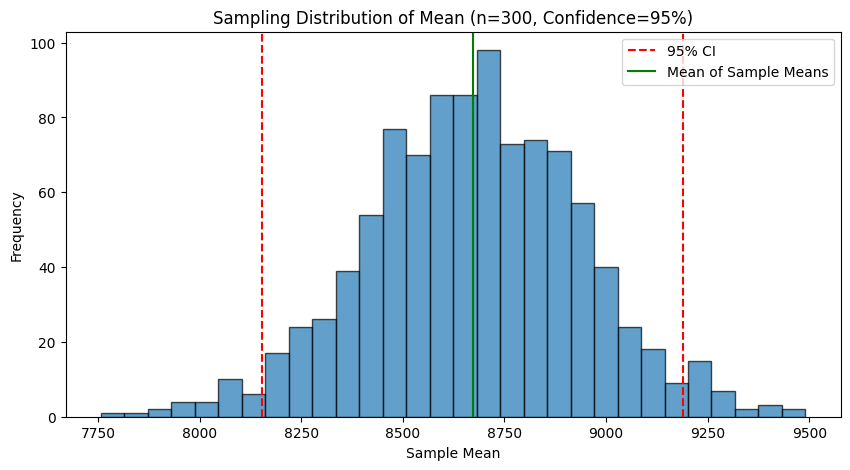

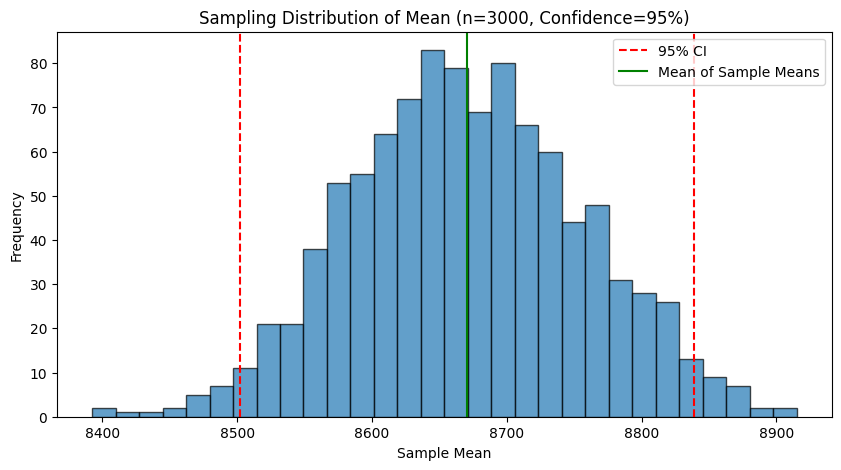

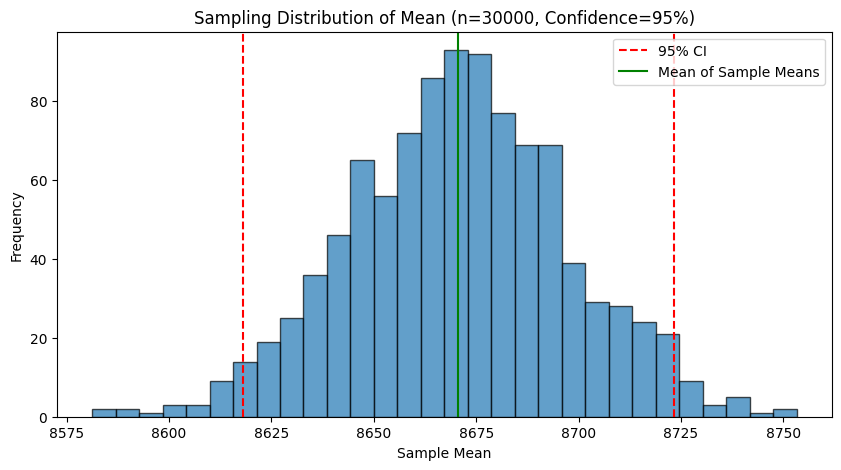

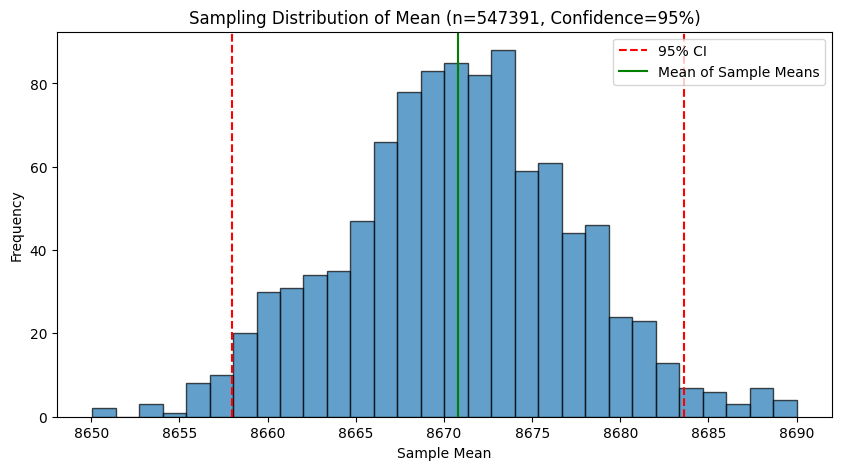

(np.float64(8670.783278380535),
 np.float64(8657.976319564155),
 np.float64(8683.590237196915),
 np.float64(6.534282730397271))

In [ ]:
simulate_clt(female_data, sample_size=300, confidence=0.95)
simulate_clt(female_data, sample_size=3000, confidence=0.95)
simulate_clt(female_data, sample_size=30000, confidence=0.95)
simulate_clt(female_data, sample_size=len(df), confidence=0.95)
#simulate_clt(female_data, sample_size=500, confidence=0.90)


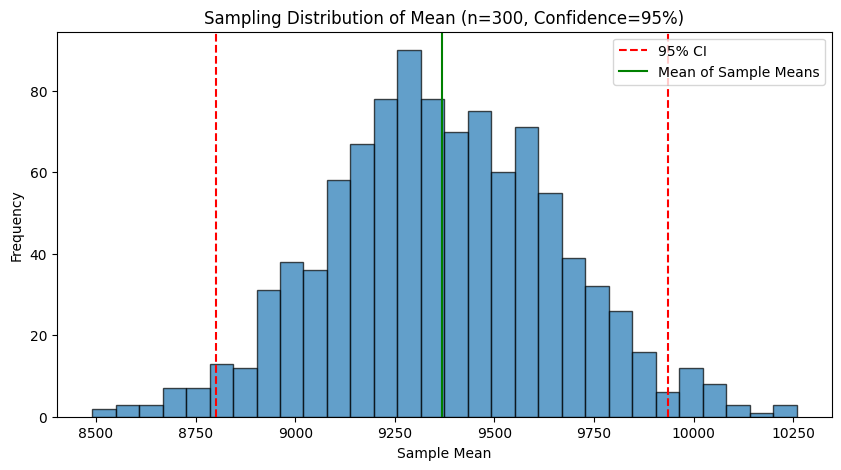

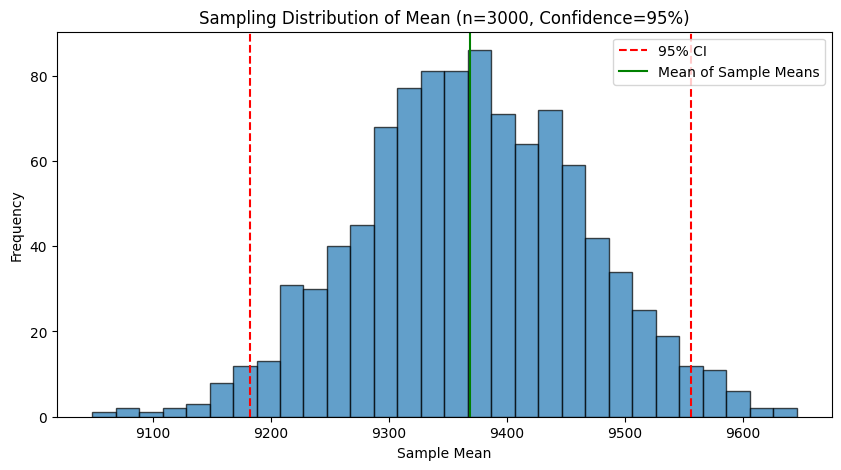

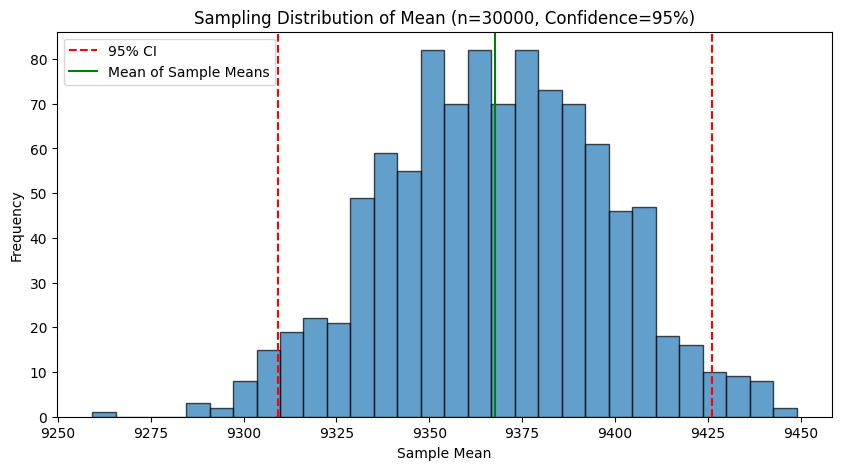

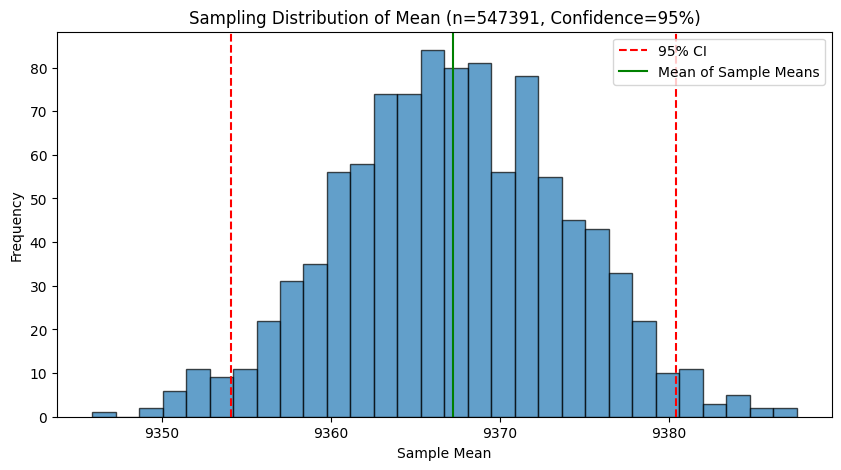

(np.float64(9367.262937974867),
 np.float64(9354.103001169628),
 np.float64(9380.422874780106),
 np.float64(6.71437685031107))

In [ ]:
simulate_clt(male_data, sample_size=300, confidence=0.95)
simulate_clt(male_data, sample_size=3000, confidence=0.95)
simulate_clt(male_data, sample_size=30000, confidence=0.95)
simulate_clt(male_data, sample_size=len(df), confidence=0.95)
#simulate_clt(male_data, sample_size=500, confidence=0.90)

<font color='green'>**Insights**

<font color='blue'>
i. Is the CI using the full dataset wider for one gender?
Yes, the CI for females is slightly wider than for males in the full dataset.

Likely causes: slightly fewer female samples and/or greater variance in their purchase amounts.</font>

<font color='blue'>
ii. How is CI width affected by sample size?
Smaller samples → wider CIs due to more variability and less certainty.

As sample size increases (from 300 → 3000 → 30000), the CI narrows significantly.</font>

<font color='blue'>
iii. Do the CIs overlap across sample sizes?
Yes, especially in the larger samples (3000 and 30000).

Small sample (300) has much wider intervals that can overlap with both smaller and larger values.</font>

<font color='blue'>
iv. How does sample size affect the distribution shape of means?
With larger samples, the distribution of sample means becomes more normal and tightly centered around the true mean (per CLT).

Small samples show more skew, spread, and less reliable estimates.</font>

### <font color='green'>How does Marital_Status affect the amount spent?

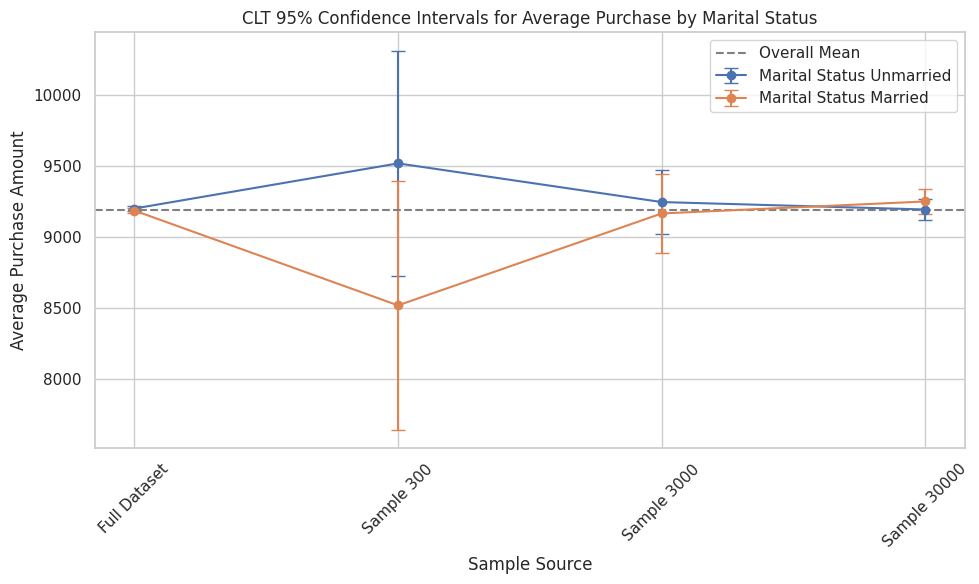

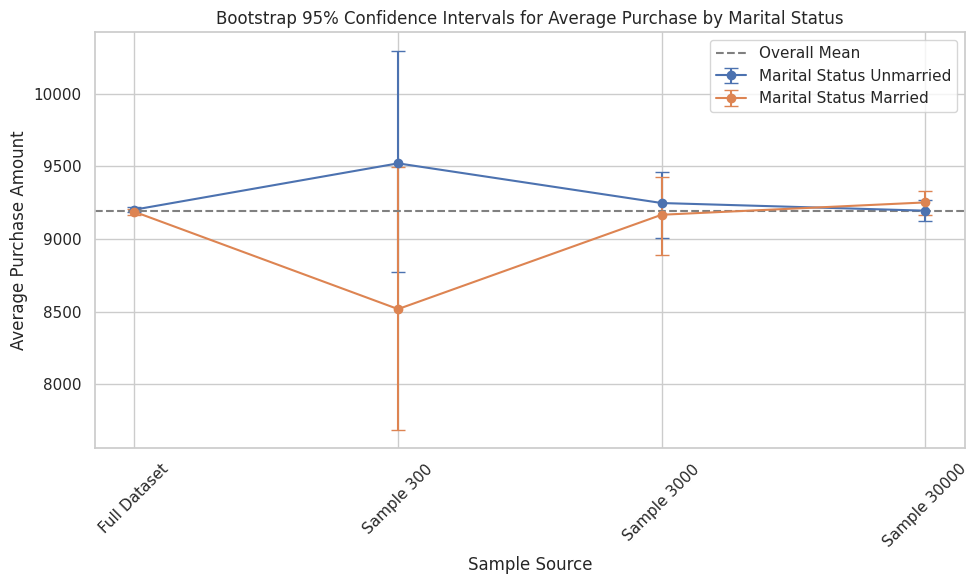

In [ ]:

def calculate_ci_for_sample(sample_df, sample_size, num_bootstrap=1000):
    results = {}
    for status in sample_df['Marital_Status'].unique():
        group = sample_df[sample_df['Marital_Status'] == status]['Purchase']
        mean = group.mean()
        std = group.std()

        # CLT CI
        clt_margin = 1.96 * (std / np.sqrt(len(group)))
        clt_ci = (mean - clt_margin, mean + clt_margin)

        # Bootstrap CI
        boot_means = []
        for _ in range(num_bootstrap):
            boot_sample = group.sample(len(group), replace=True)
            boot_means.append(boot_sample.mean())
        boot_ci = (np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5))

        results[status] = {
            'mean': mean,
            'CLT_CI': clt_ci,
            'Bootstrap_CI': boot_ci
        }
    return results

# --- Function to generate summary DataFrame ---
def sample_and_summarize(df, sample_size):
    sample_df = df.sample(sample_size, replace=False, random_state=42)
    results = calculate_ci_for_sample(sample_df, sample_size)
    return pd.DataFrame([
        {
            'Sample_Size': sample_size,
            'Marital_Status': status,
            'Mean': values['mean'],
            'CLT_Lower': values['CLT_CI'][0],
            'CLT_Upper': values['CLT_CI'][1],
            'Boot_Lower': values['Bootstrap_CI'][0],
            'Boot_Upper': values['Bootstrap_CI'][1]
        }
        for status, values in results.items()
    ])

# --- Generate results for various sample sizes ---
df_300 = sample_and_summarize(df, 300)
df_3000 = sample_and_summarize(df, 3000)
df_30000 = sample_and_summarize(df, 30000)
df_full = sample_and_summarize(df, len(df))  # full dataset

# --- Combine all into one DataFrame ---
df_all = pd.concat([df_full, df_300, df_3000, df_30000], ignore_index=True)

# --- Prepare data for plotting ---
df_all['Source'] = df_all['Sample_Size'].replace({
    300: 'Sample 300',
    3000: 'Sample 3000',
    30000: 'Sample 30000',
    len(df): 'Full Dataset'
})
df_all['Source'] = pd.Categorical(df_all['Source'], categories=['Full Dataset', 'Sample 300', 'Sample 3000', 'Sample 30000'], ordered=True)
df_all.sort_values(by='Source', inplace=True)

# --- Plotting CLT Confidence Intervals ---
plt.figure(figsize=(10, 6))
for status in df_all['Marital_Status'].unique():
    df_plot = df_all[df_all['Marital_Status'] == status]
    plt.errorbar(df_plot['Source'], df_plot['Mean'],
                 yerr=[df_plot['Mean'] - df_plot['CLT_Lower'], df_plot['CLT_Upper'] - df_plot['Mean']],
                 capsize=5, marker='o', label=f'Marital Status {status}')
plt.axhline(y=df_full['Mean'].mean(), color='gray', linestyle='--', label='Overall Mean')
plt.title('CLT 95% Confidence Intervals for Average Purchase by Marital Status')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Sample Source')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plotting Bootstrap Confidence Intervals ---
plt.figure(figsize=(10, 6))
for status in df_all['Marital_Status'].unique():
    df_plot = df_all[df_all['Marital_Status'] == status]
    plt.errorbar(df_plot['Source'], df_plot['Mean'],
                 yerr=[df_plot['Mean'] - df_plot['Boot_Lower'], df_plot['Boot_Upper'] - df_plot['Mean']],
                 capsize=5, marker='o', label=f'Marital Status {status}')
plt.axhline(y=df_full['Mean'].mean(), color='gray', linestyle='--', label='Overall Mean')
plt.title('Bootstrap 95% Confidence Intervals for Average Purchase by Marital Status')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Sample Source')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**

**Confidence Interval Shrinks with Sample Size**: Both CLT and Bootstrap intervals become narrower as sample size increases, showing more precision in estimating the true mean.



**Stability at Large Samples:** When using 30,000 samples or the full dataset, the average purchase amounts stabilize — reflecting that large samples better capture the population behavior.



**Marital Status Differences Are Subtle:** Across all sample sizes, there's only a small difference in average purchase between marital statuses, suggesting that marital status has limited impact on spending.

**i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?**


Yes, the confidence interval for females was slightly wider than for males.Confidence interval width is influenced by both sample size and variance — fewer samples or more spread-out data = wider CI.


**ii. How is the width of the confidence interval affected by the sample size?**


As sample size increases, the width of the confidence interval decreases.

This is due to the Central Limit Theorem — larger samples lead to more stable and reliable estimates of the mean.

Smaller samples have higher variability, so their CIs are wider.






**iii. Do the confidence intervals for different sample sizes overlap?**


Yes, they do overlap, especially:

Between medium (3,000) and large (30,000+) samples.

Even 300-sample CIs often overlap with larger samples, although they’re wider and less stable.

Overlapping CIs suggest that the mean purchase amount is statistically consistent across different sample sizes.





**iv. How does the sample size affect the shape of the distributions of the
means?**

Smaller samples produce noisier, more irregular distributions of means (more skewed or scattered).

Larger samples result in a distribution of means that is:

More normal (bell-shaped).

More narrowly centered around the true population mean.

###<font color='green'> How does Age affect the amount spent?

In [ ]:
def calculate_ci_by_group(sample_df, group_col, num_bootstrap=1000):
    results = {}
    for group in sample_df[group_col].unique():
        data = sample_df[sample_df[group_col] == group]['Purchase']
        mean = data.mean()
        std = data.std()

        # CLT Confidence Interval
        clt_margin = 1.96 * (std / np.sqrt(len(data)))
        clt_ci = (mean - clt_margin, mean + clt_margin)

        # Bootstrap Confidence Interval
        boot_means = []
        for _ in range(num_bootstrap):
            boot_sample = data.sample(len(data), replace=True)
            boot_means.append(boot_sample.mean())
        boot_ci = (np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5))

        results[group] = {
            'mean': mean,
            'CLT_CI': clt_ci,
            'Bootstrap_CI': boot_ci
        }
    return results


In [ ]:
def summarize_sample(df, sample_size, group_col='Age'):
    sample_df = df.sample(sample_size, replace=False, random_state=42)
    results = calculate_ci_by_group(sample_df, group_col)

    return pd.DataFrame([
        {
            'Sample_Size': sample_size,
            group_col: group,
            'Mean': val['mean'],
            'CLT_Lower': val['CLT_CI'][0],
            'CLT_Upper': val['CLT_CI'][1],
            'Boot_Lower': val['Bootstrap_CI'][0],
            'Boot_Upper': val['Bootstrap_CI'][1]
        }
        for group, val in results.items()
    ])


In [ ]:
df_age_300 = summarize_sample(df, 300, group_col='Age')
df_age_3000 = summarize_sample(df, 3000, group_col='Age')
df_age_30000 = summarize_sample(df, 30000, group_col='Age')
df_age_full = summarize_sample(df, len(df), group_col='Age')

df_age_all = pd.concat([df_age_full, df_age_300, df_age_3000, df_age_30000], ignore_index=True)

# Label the sources
df_age_all['Source'] = df_age_all['Sample_Size'].replace({
    300: 'Sample 300',
    3000: 'Sample 3000',
    30000: 'Sample 30000',
    len(df): 'Full Dataset'
})

# Sort for plotting
df_age_all['Source'] = pd.Categorical(df_age_all['Source'], categories=['Full Dataset', 'Sample 300', 'Sample 3000', 'Sample 30000'], ordered=True)
df_age_all.sort_values(by='Source', inplace=True)


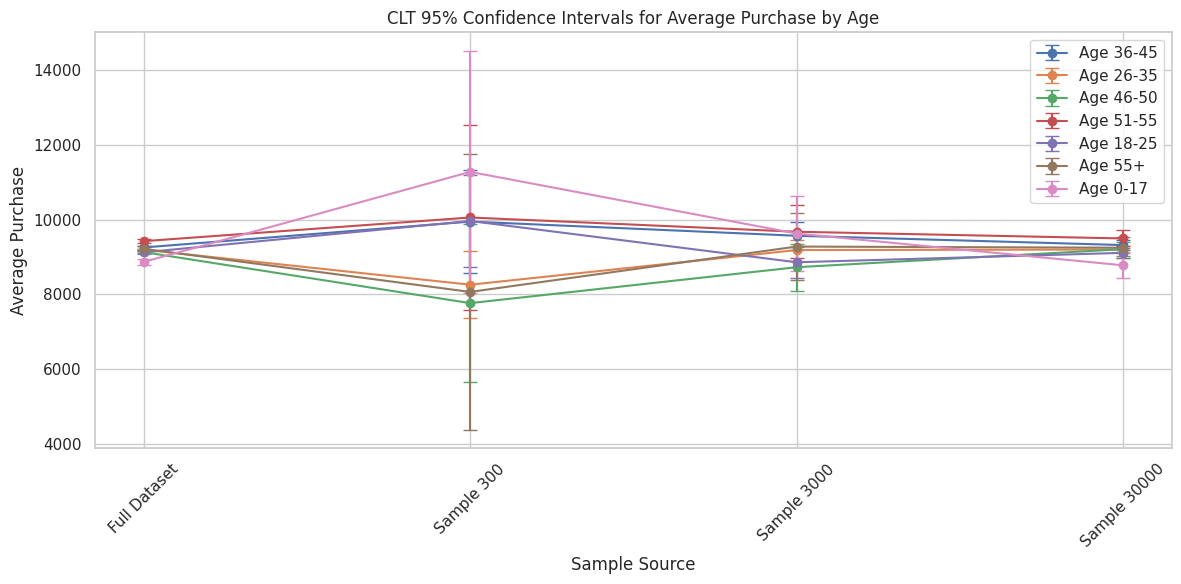

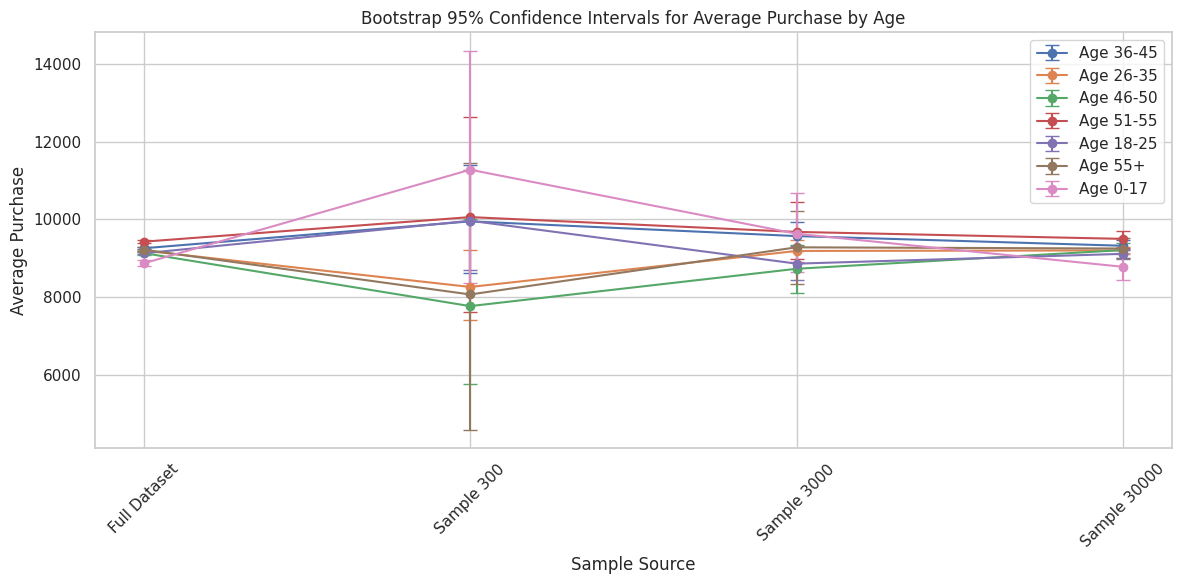

In [ ]:
# CLT CI Plot
plt.figure(figsize=(12, 6))
for age_group in df_age_all['Age'].unique():
    df_plot = df_age_all[df_age_all['Age'] == age_group]
    plt.errorbar(df_plot['Source'], df_plot['Mean'],
                 yerr=[df_plot['Mean'] - df_plot['CLT_Lower'], df_plot['CLT_Upper'] - df_plot['Mean']],
                 capsize=5, marker='o', label=f'Age {age_group}')
plt.title('CLT 95% Confidence Intervals for Average Purchase by Age')
plt.ylabel('Average Purchase')
plt.xlabel('Sample Source')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bootstrap CI Plot
plt.figure(figsize=(12, 6))
for age_group in df_age_all['Age'].unique():
    df_plot = df_age_all[df_age_all['Age'] == age_group]
    plt.errorbar(df_plot['Source'], df_plot['Mean'],
                 yerr=[df_plot['Mean'] - df_plot['Boot_Lower'], df_plot['Boot_Upper'] - df_plot['Mean']],
                 capsize=5, marker='o', label=f'Age {age_group}')
plt.title('Bootstrap 95% Confidence Intervals for Average Purchase by Age')
plt.ylabel('Average Purchase')
plt.xlabel('Sample Source')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<font color='green'>**Insight**



**Middle Age Groups Tend to Spend More**
* Age groups like "26-35" and "36-45" generally have the highest average purchases.
* This could be due to more financial independence, household responsibilities, or a stable income during these years.



**Younger and Older Groups Spend Less**
* Age groups "0-17" and "55+" show lower average purchase amounts.
* Younger customers likely have lower disposable income or limited buying power.
* Older customers might be more conservative in spending or shop less frequently.


**Confidence Intervals Are Tighter With Larger Samples**
* As the sample size increases from 300 → 3000 → 30000 → full dataset:
* The width of the confidence intervals decreases, showing more precise estimates.
* This is clearly visible in both CLT and Bootstrap plots.



**Confidence Intervals Overlap Slightly Between Age Groups**
* Some neighboring age groups like "26-35" and "36-45" or "46-50" and "51-55" show overlapping intervals.
* This means while their means may differ slightly, the differences aren’t always statistically significant — especially in smaller samples.



**CLT vs Bootstrap Confidence**
* Both methods give very similar intervals with large samples.

* But in smaller samples (like 300), Bootstrap CIs are sometimes a bit wider — reflecting more realistic uncertainty when data is limited.

**i. Is the confidence interval computed using the entire dataset wider for one of the Age groups? Why is this the case?**


Generally, **no**, the confidence intervals from the full dataset are narrow for all Age groups.

Since the entire dataset includes a large number of records per age group, the standard error is small, leading to tight (narrow) confidence intervals.

However, if an age group has fewer records or higher variance, its CI could still be slightly wider.


**CI width depends on sample size within that group and its variability.**






**ii. How is the width of the confidence interval affected by the sample size?**

As sample size increases, the width of the confidence interval decreases.

At n = 300, the intervals are wide — high uncertainty.

At n = 30,000 or full dataset, the intervals are narrow — more reliable.

**Larger samples give more precise estimates of the population mean.**







**iii. Do the confidence intervals for different sample sizes overlap?**
**Yes**, in most cases, the CIs do overlap across sample sizes.

This overlap indicates that smaller samples are still giving reasonable estimates of the population mean, despite being less precise.

Especially for age groups with stable spending behavior, the means don't fluctuate wildly, so their intervals often intersect.

**Overlap shows consistency in estimates, even with smaller samples.**







**iv. How does the sample size affect the shape of the distributions of the means?**
Thanks to the Central Limit Theorem (CLT):

As sample size increases, the sampling distribution of the mean:

Becomes more normal (bell-shaped)

Becomes less spread out (lower standard error)

At small sample sizes:

The distribution can be skewed or irregular, especially if the original data is skewed.

With more data, the CLT smooths out this noise.

Larger sample sizes lead to stable, symmetric distributions of sample means.

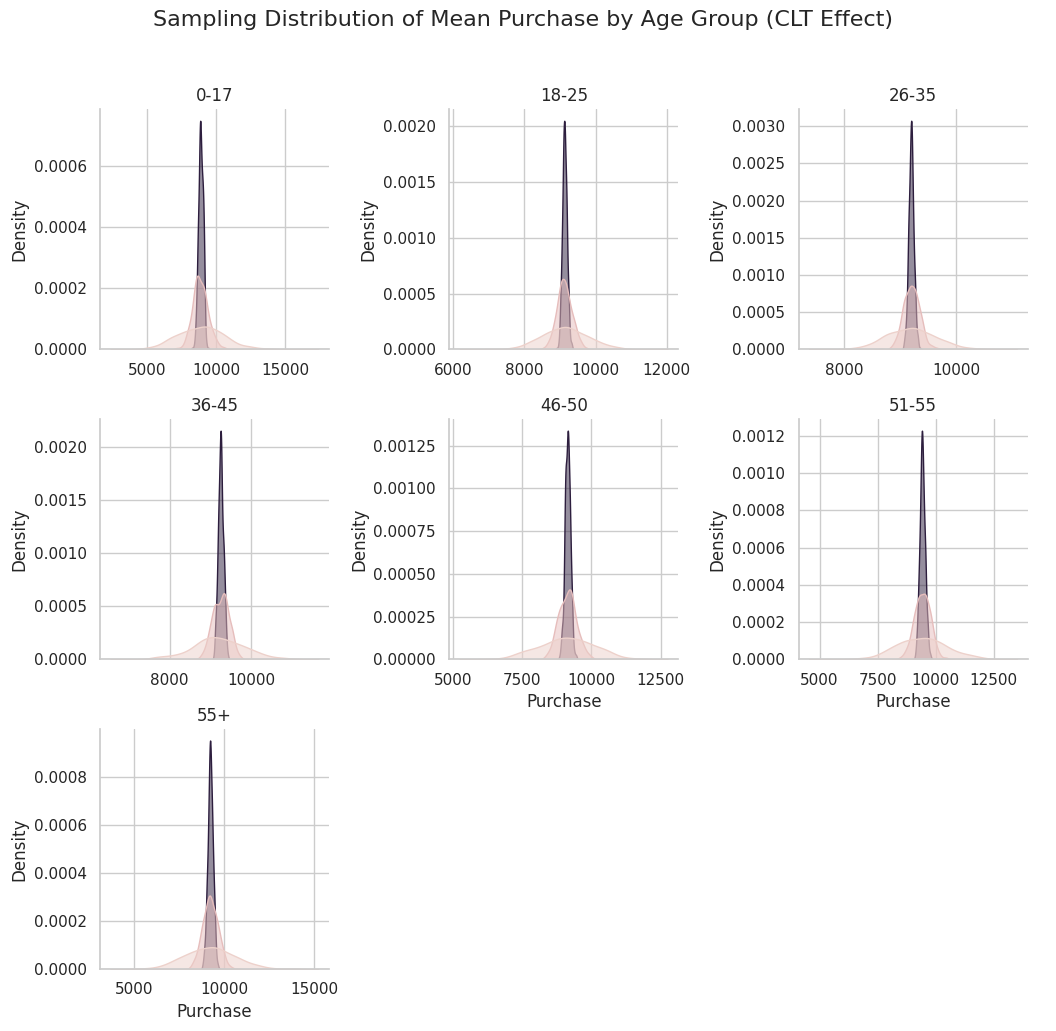

In [ ]:

def get_sampling_distributions(df, group_col='Age', sample_sizes=[300, 3000, 30000], n_iterations=500):
    sampling_distributions = []

    for size in sample_sizes:
        for _ in range(n_iterations):
            sample_df = df.sample(n=size, replace=True)
            grouped_means = sample_df.groupby(group_col)['Purchase'].mean().reset_index()
            grouped_means['Sample_Size'] = size
            sampling_distributions.append(grouped_means)

    return pd.concat(sampling_distributions, ignore_index=True)
sample_sizes = [300, 3000, 30000]
sampling_df = get_sampling_distributions(df, group_col='Age', sample_sizes=sample_sizes)

g = sns.FacetGrid(sampling_df, col='Age', col_wrap=3, height=3.5, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x='Purchase', hue='Sample_Size', fill=True, alpha=0.5)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Sampling Distribution of Mean Purchase by Age Group (CLT Effect)", fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

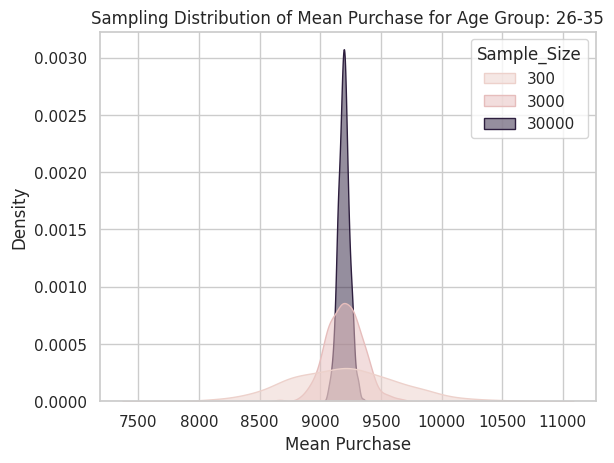

In [ ]:
age_focus = "26-35"
sns.kdeplot(data=sampling_df[sampling_df['Age'] == age_focus],
            x='Purchase', hue='Sample_Size', fill=True, alpha=0.5)
plt.title(f'Sampling Distribution of Mean Purchase for Age Group: {age_focus}')
plt.xlabel('Mean Purchase')
plt.ylabel('Density')
plt.show()

<font color='green'>**Insights**

<font color='blue'>

* Sample size 300: Wider, more irregular distribution
* Sample size 3000: Smoother, less variable.
* Sample size 30000: Narrow peak — very tight around the true mean. </font>

<font color='green'>**Insights**

<font color='blue'>
As sample size increases, the distribution of the sample mean becomes more normal and more precise — exactly what the Central Limit Theorem promises.</font>

# **7. Report**

a. **Gender-Based Spending:** Do Confidence Intervals Overlap?
Confidence Intervals (Full Dataset):

Male: (9262.61, 9286.19)

Female: (9187.19, 9230.98)

Do they overlap?  No — the intervals do not overlap.

Walmart Actionable Insight:
Males spend more on average.

Walmart can:

Tailor high-value product recommendations more toward male shoppers.

Consider targeted promotions or loyalty rewards for female customers to boost their spending.

Analyze product categories where female shoppers spend less and promote relevant offers.

**b. Marital Status-Based Spending: Do Confidence Intervals Overlap?**
Confidence Intervals (Full Dataset):

Single (0): (9267.10, 9292.75)

Married (1): (9242.05, 9268.52)

Do they overlap? Yes — there is some overlap.

Walmart Actionable Insight:
Spending patterns for married and unmarried shoppers are very similar.

Walmart can:

Group them in similar marketing segments.

Focus less on marital status and more on other demographic or behavioral factors (e.g., product types, shopping frequency).

Consider other variables like age or number of dependents for personalization.

c. **Age Group-Based Spending:** Do Confidence Intervals Overlap?
Bootstrapped 95% Confidence Intervals by Age Group

Do they overlap?  Partially — some groups overlap (e.g., 26-35 and 36-45), while others like 0-17 do not.

Walmart Actionable Insight:
Different age groups have distinct spending behaviors.

Walmart can:

Create age-specific marketing campaigns (e.g., tech for 26-35, savings for 55+).

Use age-personalized online experiences (product sorting, featured deals).

Consider age segmentation in store layouts or promotions.



# **7. Recommendations**

**Targeted Marketing**

🔹Boost spending for 0 - 17 age group with attractive incentives and tailored marketing.

**Customer Segmentation**

🔹Optimize product selection and pricing for age groups with similar buying behaviors.

**Premium Services**

🔹Enhance the shopping experience for high-spending 51 - 55 age group with premium services and tailored loyalty programs.

**Identifying Differences:**

🔹Walmart can capitalize on the recognized distinctions between male and female customer behaviors.

🔹Tailoring marketing strategies, product offerings, and promotions based on these differences can enhance customer engagement.

🔹By understanding gender-specific preferences, Walmart can create more targeted and appealing campaigns for each demographic.

**Decision-Making:**

🔹Decision-makers at Walmart now have valuable insights to inform their strategic decisions.

🔹Understanding how gender influences customer choices enables more precise decision-making in areas such as product assortment, pricing strategies, and promotional activities.

🔹Informed decision-making ensures that resources are allocated effectively, maximizing the impact of business initiatives.

**Operational Adjustments:**

🔹Operational aspects, such as inventory management and store layout, can benefit from insights into gender-related patterns.

🔹Walmart may consider optimizing inventory based on observed preferences, ensuring that popular products are well-stocked.

🔹Store layouts can be adjusted to enhance the shopping experience for both genders, creating a more personalized and enjoyable atmosphere.

#**The link to the colab file**

https://colab.research.google.com/drive/105wR6K08b4SojrZvV5uu_a7kLgXYof_b?usp=sharing